# EDA with Vertebrae Radiomic Feature Matrix
CS3310 : Muftuler Lab Project 1

Here we explore the radiomic features extracted for each vertebrae in the dataset. One key finding from this notebook is the severe imbalance of the modic changes present in the dataset, which is shown in the distribution plots of modic changes in the dataset. Statistical testing of the modic change radiomic features was unsuccessful because of the lack of data in each group, preventing the team from finding an significant features.

Leading Finding : Not enough data for further modic change analysis

### Library Imports

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import scipy.stats as stats 
from scipy.stats import kruskal, f_oneway
from tabulate import tabulate
from statsmodels.stats.multitest import multipletests

### Load Vertebrae CSV

In [16]:
raw_radiomic_vb = pd.read_csv('../spine/data_radiomics_vertebrates.csv', index_col=0)

raw_radiomic_vb.sample(15)

original_firstorder_10Percentile  original_firstorder_90Percentile  \
S201_L5                             180.0                             390.0   
S287_L2                             182.0                             346.0   
S232_L2                             212.0                             544.0   
S226_L1                             161.0                             335.0   
S273_L2                             235.0                             438.0   
S243_L3                             110.0                             220.0   
S237_L3                             207.0                             400.0   
S236_L3                             200.0                             404.0   
S277_L3                             155.0                             312.0   
S236_L1                             220.0                             413.0   
S230_L5                             157.0                             285.0   
S247_L3                             144.0                             278.0   
S244_L3                             342.0                             733.0   
S239_L4                             105.0                             193.0   
S287_L5                             133.0                             260.0   

         original_firstorder_Energy  original_firstorder_Entropy  \
S201_L5                2.749534e+09                     3.784489   
S287_L2                2.871331e+09                     3.488170   
S232_L2                5.733354e+09                     4.435210   
S226_L1                1.464492e+09                     3.484969   
S273_L2                3.662816e+09                     3.781940   
S243_L3                1.135440e+09                     2.877154   
S237_L3                2.348946e+09                     3.739230   
S236_L3                2.468187e+09                     3.736095   
S277_L3                2.157994e+09                     3.412900   
S236_L1                2.290477e+09                     3.657400   
S230_L5                1.307917e+09                     3.111598   
S247_L3                1.294469e+09                     3.161060   
S244_L3                8.888815e+09                     4.652827   
S239_L4                5.492813e+08                     2.598459   
S287_L5                1.484998e+09                     3.104706   

         original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
S201_L5                                   102.0                      5.249868   
S287_L2                                    89.0                      6.375954   
S232_L2                                   170.0                      4.005347   
S226_L1                                    95.0                      3.565665   
S273_L2                                   104.0                      4.072416   
S243_L3                                    59.0                      7.317091   
S237_L3                                    98.0                      6.244466   
S236_L3                                   101.0                      3.982621   
S277_L3                                    77.0                      5.970908   
S236_L1                                    94.0                      4.433869   
S230_L5                                    64.0                      4.362244   
S247_L3                                    66.0                      4.343891   
S244_L3                                   207.0                      3.120391   
S239_L4                                    44.0                      8.343617   
S287_L5                                    66.0                      4.919377   

         original_firstorder_Maximum  original_firstorder_Mean  \
S201_L5                       1072.0                282.881405   
S287_L2                        803.0                264.463674   
S232_L2                       1281.0                375.029651   
S226_L1                        656.0                246.467200   
S273_L2                     

### Print Column Names 

In [17]:
for column in raw_radiomic_vb.columns:
    print(column)

original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_Mean
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_TotalEnergy
original_firstorder_Uniformity
original_firstorder_Variance
original_glcm_Autocorrelation
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_ClusterTendency
original_glcm_Contrast
original_glcm_Correlation
original_glcm_DifferenceAverage
original_glcm_DifferenceEntropy
original_glcm_DifferenceVariance
original_glcm_Id
original_glcm_Idm
original_glcm_Idmn
original_glcm_Idn
original_glcm_Imc1
original_glcm_Imc2
original_glcm_InverseVariance
original_glcm_JointAverag

### Radiomics Features Explanation 
Summarized from the pyradiomics documentation which can be found here : https://pyradiomics.readthedocs.io/en/latest/features.html

#### First Order Features
Describe distribution of voxel intensities within the image region defined by the mask through commonly used and basic metrics 

 - **Energy** : Measure of the magnitude of voxel values in an image. Larger value implies greater sum of the squares of these values. This feature is volume confounded. 
 - **Total Energy** : Value of energy clased by the volume of the voxel in cubic mm 
 - **Entropy** : Specifies the uncertainty/randomness of the image values. Measures the average amount of info required to encode image values.
 - **Minimum**: Minimum value of of the image array
 - **10th Percentile** : 10th percentile of image array
 - **90th Percentile** : 90th percentile of image array
 - **Maximum** : Maximum value of the image array
 - **Mean** : Mean value of the image array 
 - **Median** : Median value of the image array
 - **Interquartile Range** : Interquartile range of the image array (75th - 25th percentiles)
 - **Range** : Range of values in image array (max - min)
 - **Mean Absolute Deviation (MAD)** : Mean distance of all intensity values from the mean value of the image array
 - **Robust Mean Absolute Deviation (rMAD)** : Mean distance of all intensity values from the man value calculated on the subset of image array with gray levels between 10th and 90th percentiles 
 - **Root Mean Squared** : Square root of the mean of all the squared intensity values. Another measure of magnitude of the image values. Feature is volume confounded 
 - **Standard Deviation** : Std Dev of image array, measures amount of variation from the mean value, not included by default bc of correlation with variance
 - **Skewness** : Measures the asymmetry of the distribution of values about the mean value. Depending on where the tail is elongated and the mass of the distribution is concentrated, this value can be pos or neg
 - **Kurtosis** : Measure of the 'peakedness' of the distribution of values in the image ROI. Higher kurtosis implies mass of distribution is concentrated towards the tails rather than center of distribution. Lower kurtosis implies opposite. 
 - **Variance** : Mean of the squared distances of each intensity value from the mean value. Measure of the spread of the distribution about the mean. 
 - **Uniformity** : Measure of the sum of the squares of eac intensity value. This is a measure of the heterogeneity of the image array, where a greater uniformity implies a greater heterogeneity or a greater range of discrete intensity values 

#### Shape Features

In this group of features we included descriptors of the three-dimensional size and shape of the tumor region. Let in the following definitions denote V the volume (mm3) and A the surface area of the volume (mm2) of interest.

- **Mesh Volume** : The volume of the ROI V is calculated from the triangle mesh of the ROI. For each face i in the mesh, defined by points ai,bi and ci, the (signed) volume Vf of the tetrahedron defined by that face and the origin of the image (O) is calculated. (1) The sign of the volume is determined by the sign of the normal, which must be consistently defined as either facing outward or inward of the ROI.
- **Voxel Volume** : The volume of the ROI Vvoxel is approximated by multiplying the number of voxels in the ROI by the volume of a single voxel Vk. This is a less precise approximation of the volume and is not used in subsequent features. This feature does not make use of the mesh and is not used in calculation of other shape features.
- **Surface Area** : SA of region in square mm 
- **Surface Volume Ratio** : SA to V ratio, lower value indicates more sphere like shape. Feature is not dimensionless and partly dependent on volume of ROI
- **Sphericity** : Measure of the roundness of the shape of the region relative to a sphere. This is a dimensionless measure independent of scale or orientation. Values range from 0 to 1 with a value of 1 indicates a perfect sphere. 
- **Compactness 1** : Measure of how compact the region is relative to a sphere (most compact). Correlated to sphereicity and is redundant 
- **Compactness 2** : Measure of how compact the region is relative to a sphere. Values range from 0 to 1, a value of 1 indicates a perfect sphere
- **Spherical Disproportion** : Ratio of the SA of the region to the SA of a sphere with the same volume as the region. This is the inverse of sphericity. Values are greater than/equal to 1, with a value of 1 indicating a perfect sphere
- **Max 3D Diameter** : Largest pairwise euclidean distance between surface voxels. AKA Feret Diameter
- **Max 2D Diamters Slice** : Calculate largest pairwise euclidean distance between surface voxels in the row-column plane. 
- **Max 2D Diameter Column** : Calculate largest pairwise euclidean distance between surface voxels in row slice plane
- **Max 2D Diameter Row** : Calculate largest pairwise euclidean distance between surface voxels in column slice plane 
- **Major Axis Length** : This feature yield the largest axis length of the ROI-enclosing ellipsoid and is calculated using the largest principal component λmajor. The principal component analysis is performed using the physical coordinates of the voxel centers defining the ROI. It therefore takes spacing into account, but does not make use of the shape mesh.
- **Minor Axis Length** : This feature yield the second-largest axis length of the ROI-enclosing ellipsoid and is calculated using the largest principal component λminor. The principal component analysis is performed using the physical coordinates of the voxel centers defining the ROI. It therefore takes spacing into account, but does not make use of the shape mesh.
- **Least Axis Length** : This feature yield the smallest axis length of the ROI-enclosing ellipsoid and is calculated using the largest principal component λleast. In case of a 2D segmentation, this value will be 0.
- **Elongation** : Elongation shows the relationship between the two largest principal components in the ROI shape. For computational reasons, this feature is defined as the inverse of true elongation.
- **Flatness** : Flatness shows the relationship between the largest and smallest principal components in the ROI shape. For computational reasons, this feature is defined as the inverse of true flatness.

#### Grey Level Co-occurrence Matrix (GLCM) Features 

A Gray Level Co-occurrence Matrix (GLCM) of size Ng×Ng describes the second-order joint probability function of an image region constrained by the mask and is defined as P(i,j|δ,α). The (i,j)th element of this matrix represents the number of times the combination of levels i and j occur in two pixels in the image, that are separated by a distance of δ pixels in direction α, and Ng is the number of discrete gray level intensities. The distance δ from the center voxel is defined as the distance according to the infinity norm. For δ=1, this assumes 26-connectivity in 3D and for δ=2 a 98-connectivity.

Note that pyradiomics by default computes symmetrical GLCM!

 - **Autocorrelation** : Measure of the magnitude of the fineness and coarseness of the texture
 - **Average Intensity** : Return th emean gray level intensity of the i distribution
 - **Cluster Prominence** : Measure of the skewness and asymmetry of the GLCM. Higher value implies more asymmetry about the mean while a lower value indicates a peak near the mean value and variation about the mean
 - **Cluster Shade** : Measure of the skewness and uniformity of the GLCM. Higher cluster shade implies greater asymmetry about the mean
 - **Clutser Tendency** : Measure of groupings of voxels with similar grey-level values 
 - **Contrast** : Measure of the local intensity variation. Larger value correlates with a greater disparity in intensity values among neighboring voxels 
 - **Correlation** : Value between 0 and 1 showing the linear dependency of the gray level values to their respective voxels in the GLCM 
 - **Difference Average** : Measures the relationship between occurrences of pairs with similar intensity values and occurrences of pairs with differing signal intensity 
 - **Difference Entropy** : Measure of the randomness/variability in neighborhiid intensity value differences 
 - **Difference Variance** : Measure of the heterogeneity that places higher weights on differing intensity level pairs that deviate more from the mean 
 - **Joint Energy** : Measure of the homogenous patterns in the image. A greater energy implies that there are more instances of intensity value pairs in the image that neighbor each other at higher frequencies 
 - **Joint Entropy** : Measure of the randomness/variability in neighborhood intensity values.
 - **IMC 1** : IMC1 assesses the correlation between the probability distributions of i and j (quantifying the complexity of the texture), using mutual information
 - **IMC 2** : IMC2 also assesses the correlation between the probability distributions of i and j (quantifying the complexity of the texture).
 - **IDM (Inverse Difference Moment)** : is a measure of the local homogeneity of an image. IDM weights are the inverse of the contrast weights. 
 - **IDMN (Inverse Difference Moment Normalized)** : is a measure of the local homogeneity of an image. IDMN weights are the inverse of the contrast weights. IDMN normalizes the square of the difference between neighboring intensity values by dividing over the square of the total number of discrete intensity values. 
 - **ID (Inverse Difference)** : is another measure of the local homogeneity of an image. With more uniform grey levels the denominator will remain low resulting in a higher overall value. 
 - **IDN (Inverse Difference Normalized)** : is another measure of the local homogeneity of an image. IDN normalizes the difference between the neighboring intensity values by dividing over the total number of dicrete intensity values. 
 - **Inverse Variance** : Mean inverse variance
 - **Maximum Probability** : Occurrences of the most predominant pair of neighboring intensity values 
 - **Sum Average** : Measures the relationship between occurrences of pairs with lower intensity values and occurrences of pairs with higher intensity values. 
 - **Sum Entropy** : Sum of neighborhood intensity value differences. 
 - **Sum Squares** : Measure in distribution of neighboring intensity level pairs about the mean intensity level in the GCLM 

#### Grey Level Size Zone Matrix (GLSZM) Features 

A GLSZM quantifies gray level zones in an image. A gray level zone is defined as a the number of connected voxels that share the same gray level intensity. A voxel is considered connected if the distance is 1 according to the infinity norm. This yields a 26-connected region in a 3D image, and an 8-connected region in a 2D image. In a gray level size zone matrix P(i,j) the (i,j)th element describes the number of times a gray level zone with gray level i and size j appears in image.

 - **Small Area Emphasis** : A measure of the distribution of small size zones, with greater value indictaive ov more smaller size zones and more fine textures 
 - **Large Area Emphasis** : A measure of the distribution of large area size zones, with a greater value indicative of more larger size zones and more coarse textures. 
 - **Grey Level Non-Uniformity** : Measures the variablility of gray level intensity values in the image, iwth a lower value indicating more homogeneity in intensity values 
 - **Grey Level Non-Uniformity Normalized** : Normalized version of grey level non-uniformity
 - **Size Zone Non-Uniformity** : Measures the variability of size zone volumes in the image with a lower value indicating more homgoeneity in size zone volumes
 - **Size Zone Non-Uniformity Normalized** : Normailized version of size zone none uniformity 
 - **Zone Percentage** : Measures the coraseness of the texture by taking the ratio of number of zones and number of voxels in the ROI. Values close to/equal to 1 indicates a larger portion of the ROI consists of small zones (indicates a fine texture)
 - **Grey Level Variance** : Measures the variance in zone size volumes for the zones
 - **Zone Variance** : Measures the variance in in zone size volumes for the zones 
 - **Zone Entropy** : Measures the uncertainty/randomness in the distribution of zone sizes and grey levels. A higher value indicates more heterogeneity in the texture patterns
 - **Low Grey Level Zone Emphasis (LGLZE)** : Measures the distribution of lower gray-level size zones, with a higher value indicating a greater proportion of lower gray-level values and size zones in the image
 - **High Grey Level Zone Emphasis (HGLZE)** : Measures the distribution of the higher gray-level values, with a higher value indicating a greater proportion of higher gray-level values and size zones in the image.
 - **Small Area Low Grey Level Emphasis (SALGLE)** : Measures the proportion in the image of the joint distribution of smaller size zones with lower gray-level values.
 - **Small Area High Grey Level Emphasis (SAHGLE)** : Measures the proportion in the image of the joint distribution of smaller size zones with higher gray-level values.
 - **Large Area Low Grey Level Emphasis (LALGLE)** : Measures the proportion in the image of the joint distribution of larger size zones with lower gray-level values.
 - **Large Area High Grey Level Emphasis (LAHGLE)** : Measures the proportion in the image of the joint distribution of larger size zones with higher gray-level values.

#### Grey Level Run Length Matrix (GLRLM) Features

A Gray Level Run Length Matrix (GLRLM) quantifies gray level runs in an image. A gray level run is defined as the length in number of pixels, of consecutive pixels that have the same gray level value. In a gray level run length matrix P(i,j|θ), the (i,j)th element describes the number of times a gray level i appears consecutively j times in the direction specified by θ

 - **Short Run Emphasis** : A measure of the distribution of short run lengths with a greater value indicative of shorter run lengths and more fine textural textures. 
 - **Long Run Emphasis** : A measure of the distribution of long run lengths, with a greater value indicative of longer run lenths and more coarse structural textures
 - **Grey Level Non-Uniformity** : Measures the similarity of gray-level intensity values in the image, where a lower GLN value correlates with a greater similarity in intensity values.
 - **Grey Level Non-Uniformity Normalized** : Normalized version of the Grey Level Non-Uniformity 
 - **Run Length Non-Uniformity** : Measures the similarity of run lengths throughout the image, with a lower value indicating more homogeneity among run lengths in the image
 - **Run Length Non-Uniformity Normalized** : Normalized version of run length non-uniformity
 - **Run Percentage** : Measures the coarseness of the texture by taking the ratio of number of runs and number of voxels in the ROI. Values closer to/equal to 1 indicate a large portion of the ROI consists of short runs (fine texture)
 - **Grey Level Variance** : Measures the variance in grey level intensity for the run in the ROI
 - **Run Variance** : Measures the variance in runs for the run lengths.
 - **Run Entropy** : Measures the uncertainty/randomness in the distribution of run lengths and grey levels (??)
 - **Low Grey Level Run Emphasis (LGLRE)** : Measures the distribution of low grey level values with a higher value indicating a greater concentration of low grey level values in the image
 - **High Grey Level Run Emphasis (HGLRE)** : Measures the distribution of the higher grey level values with a higher value indicating a greater concentration of high level values in the image 
 - **Short Run Low Grey Level Emphasis (SRLGLE)** : Measures the joint distribution of shorter run lengths with lower gray-level values.
 - **Short Run High Grey Level Emphasis (SRHGLE)** : Measures the joint distribution of shorter run lengths with hgiher grey level values
 - **Long Run Low Grey Level Emphasis (LRLGLE)** : Measures the joint distribution of long run lengths with lower gray-level values.
 - **Long Run High Gray Level Emphasis (LRHGLE)** : Measures the joint distribution of long run lengths with higher gray-level values

#### Neighboring Grey Tone Difference Matrix (NGTDM) Features 

A Neighbouring Gray Tone Difference Matrix quantifies the difference between a gray value and the average gray value of its neighbours within distance δ. The sum of absolute differences for gray level i is stored in the matrix

 - **Coarseness** : Coarseness is a measure of average difference between the center voxel and its neighbourhood and is an indication of the spatial rate of change. A higher value indicates a lower spatial change rate and a locally more uniform texture.
 - **Contrast** : Contrast is a measure of the spatial intensity change, but is also dependent on the overall gray level dynamic range. Contrast is high when both the dynamic range and the spatial change rate are high, i.e. an image with a large range of gray levels, with large changes between voxels and their neighbourhood.
 - **Busyness** : A measure of the change from a pixel to its neighbour. A high value for busyness indicates a ‘busy’ image, with rapid changes of intensity between pixels and its neighbourhood.
 - **Complexity** : An image is considered complex when there are many primitive components in the image, i.e. the image is non-uniform and there are many rapid changes in gray level intensity.
 - **Strength** : A measure of the primitives in an image. Its value is high when the primitives are easily defined and visible, i.e. an image with slow change in intensity but more large coarse differences in gray level intensities.

#### Grey Level Dependence Matrix (GLDM) Features

A Gray Level Dependence Matrix (GLDM) quantifies gray level dependencies in an image. A gray level dependency is defined as a the number of connected voxels within distance δ that are dependent on the center voxel. A neighbouring voxel with gray level j is considered dependent on center voxel with gray level i if |i−j|≤α. In a gray level dependence matrix P(i,j) the (i,j)th element describes the number of times a voxel with gray level i with j dependent voxels in its neighbourhood appears in image.

 - **Small Dependence Emphasis (SDE)** : A measure of the distribution of small dependencies, with a greater value indicative of smaller dependence and less homogeneous textures.
 - **Large Dependence Emphasis (LDE)** : A measure of the distribution of large dependencies, with a greater value indicative of larger dependence and more homogeneous textures.
 - **Grey Level Non-Uniformity (GLN)** : Measures the similarity of gray-level intensity values in the image, where a lower GLN value correlates with a greater similarity in intensity values.
 - **Dependence Non-Uniformity** : Measures the similarity of dependence throughout the image, with a lower value indicating more homogeneity among dependencies in the image.
 - **Dependence Non-Uniformity Normalized** : Normalized version of Dependence Non-uniformity 
 - **Grey Level Variance** : Variance in grey level of image
 - **Dependence Variance** : Varaince in dependence size of the image 
 - **Dependence Entropy** : Measures the uncertainty/randomness in the distribution of dependence sizes
 - **Low Grey Level Emphasis (LGLE)** : Measures the distribution of low gray-level values, with a higher value indicating a greater concentration of low gray-level values in the image.
 - **High Grey Level Emphasis (HGLE)** : Measures the distribution of the higher gray-level values, with a higher value indicating a greater concentration of high gray-level values in the image.
 - **Small Dependence Low Grey Level Emphasis (SDLGLE)** : Measures the joint distribution of small dependence with lower gray-level values
 - **Small Dependence High Grey Level Emphasis (SDHGLE)** : Measures the joint distribution of small dependence with higher gray-level values.
 - **Large Dependence Low Grey Level Emphasis (LDLGLE)** : Measures the joint distribution of large dependence with lower gray-level values.
 - **Large Dependence High Grey Level Emphasis (LDHGLE)** : Measures the joint distribution of large dependence with higher gray-level values.

### Cleaning/Converting Columns 

 - Select first rating from modic change column (these are radiologist labels)
 - Fill NaN ODI values with 0 - (indicating no ODI score was taken from the patient)

In [18]:
radiomic_feature_names = list(raw_radiomic_vb.drop('Modic Changes', axis=1).columns)

# Drop first order features 
first_order_feat = list(np.array(radiomic_feature_names)[['firstorder' in feature for feature in radiomic_feature_names]])
radiomic_vb = raw_radiomic_vb.drop(first_order_feat, axis=1)

# Taking scoring from R1 as it is from radiologist 
radiomic_vb['Modic Changes'] = raw_radiomic_vb['Modic Changes'].apply(lambda x: x.split('/')[0])
radiomic_vb['Modic Changes'] = radiomic_vb['Modic Changes'].astype('category')

vb_col = pd.Series(radiomic_vb.index).apply(lambda x: x.split('_')[1])
vb_col = vb_col.set_axis(radiomic_vb.index)
radiomic_vb['vb'] = vb_col

radiomic_vb['Owestry score (ODI))'] = radiomic_vb['Owestry score (ODI))'].fillna(0)
radiomic_vb.sample(15)

original_glcm_Autocorrelation  original_glcm_ClusterProminence  \
S261_L2                     113.556148                      3932.422730   
S261_L4                     107.259507                      3148.584082   
S203_L5                     117.674804                      2747.997147   
S265_L3                     120.846067                      4615.877259   
S255_L4                      18.455480                       291.292793   
S221_L2                      35.927340                       408.208855   
S205_L3                      36.704865                       868.756078   
S259_L2                      97.909192                      3176.197639   
S242_L2                      77.013101                      2430.947872   
S285_L3                     104.635463                      2432.007291   
S239_L3                      30.296003                       203.652178   
S237_L4                     132.576301                      3285.331582   
S224_L5                      80.998921                      1565.316124   
S283_L3                      85.132986                      6347.114331   
S222_L1                     357.415343                     30693.683149   

         original_glcm_ClusterShade  original_glcm_ClusterTendency  \
S261_L2                   57.570053                      22.112469   
S261_L4                   45.406937                      21.923116   
S203_L5                   23.395075                      27.382654   
S265_L3                  121.795750                      24.519848   
S255_L4                   17.817881                       5.484672   
S221_L2                   21.528348                       7.376711   
S205_L3                   38.118175                      11.136122   
S259_L2                   94.265677                      25.558325   
S242_L2                   96.576692                      15.829575   
S285_L3                   21.788769                      22.121384   
S239_L3                   11.629593                       5.597409   
S237_L4                   77.839709                      26.835211   
S224_L5                   21.222404                      20.508491   
S283_L3                  175.470375                      25.922071   
S222_L1                  234.351759                      99.160775   

         original_glcm_Contrast  original_glcm_Correlation  \
S261_L2                5.508497                   0.591010   
S261_L4                5.650421                   0.582783   
S203_L5                7.227195                   0.580047   
S265_L3                4.852859                   0.664983   
S255_L4                1.567566                   0.557771   
S221_L2                2.187061                   0.541107   
S205_L3                2.894195                   0.587776   
S259_L2                3.885228                   0.736143   
S242_L2                3.079473                   0.675778   
S285_L3                3.952133                   0.692502   
S239_L3                2.214747                   0.426223   
S237_L4                7.109889                   0.577627   
S224_L5                4.105151                   0.663697   
S283_L3                4.545072                   0.699886   
S222_L1               14.012022                   0.750175   

         original_glcm_DifferenceAverage  original_glcm_DifferenceEntropy  \
S261_L2                         1.663700                         2.360377   
S261_L4                         1.634376                         2.351959   
S203_L5                         2.011782                         2.552012   
S265_L3                         1.599539                         2.305560   
S255_L4                         0.878588                         1.641237   
S221_L2                         1.056349                         1.831428   
S205_L3                         1.230616                         1.979895   
S259_L2                         1.408694                         2.161229   
S

### Distribution of Modic Changes 

Text(0.5, 1.0, 'Number of Vertebrae Exhibiting Modic Changes')

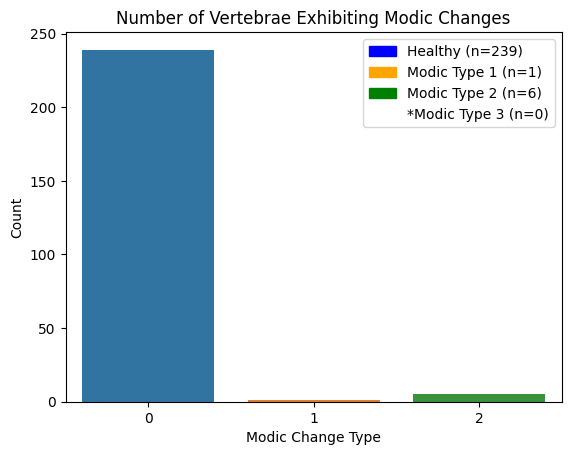

In [39]:
sns.countplot(x=radiomic_vb['Modic Changes'])
patches = [matplotlib.patches.Patch(color='blue', label='Healthy (n=239)'),
           matplotlib.patches.Patch(color='orange', label='Modic Type 1 (n=1)'),
           matplotlib.patches.Patch(color='green', label='Modic Type 2 (n=5)'),
           matplotlib.patches.Patch(color='white', label='*Modic Type 3 (n=0)')]
plt.legend(handles=patches)
plt.ylabel('Count')
plt.xlabel('Modic Change Type')
plt.title('Number of Vertebrae Exhibiting Modic Changes')

In [20]:
radiomic_vb['Modic Changes'].value_counts()

0    239
2      5
1      1
Name: Modic Changes, dtype: int64

### Modic Changes Grouped by Vertebrae Level 

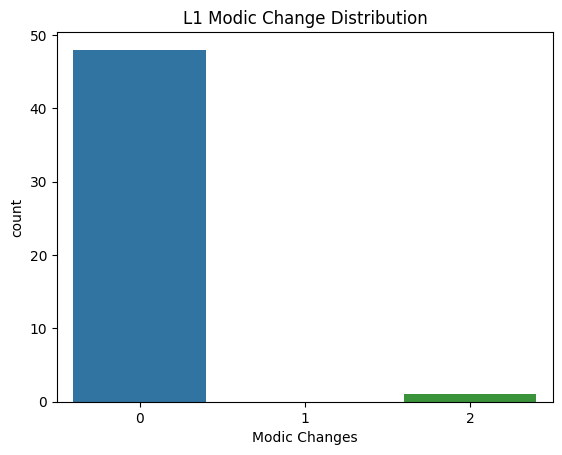

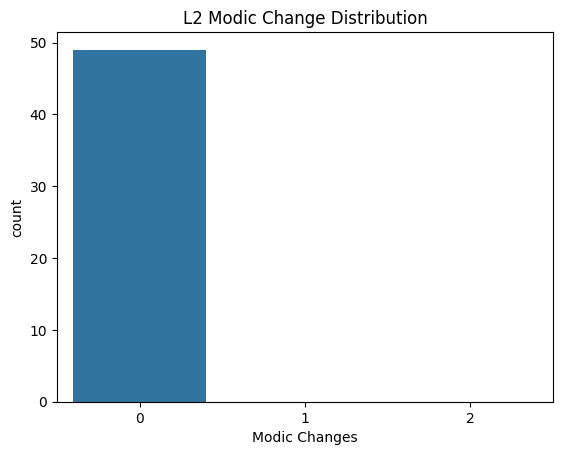

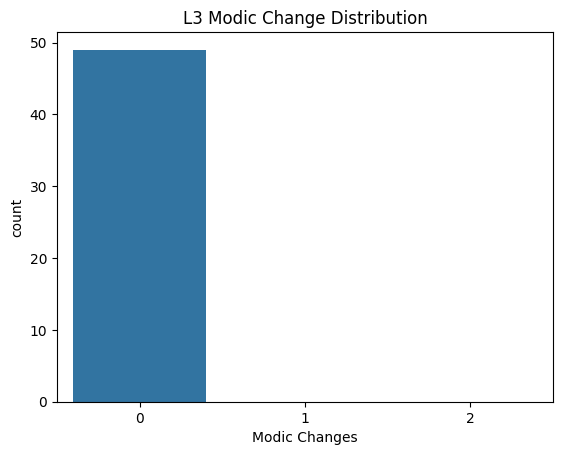

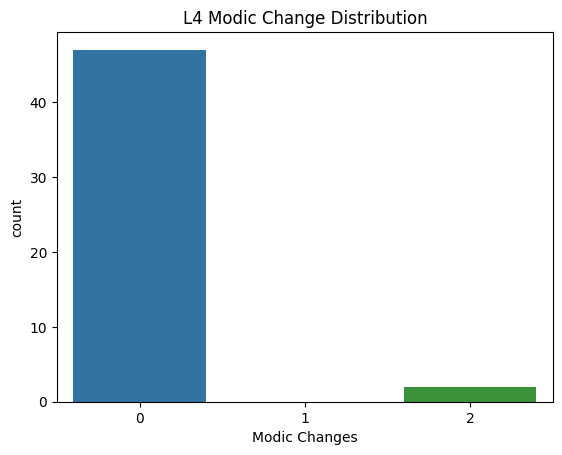

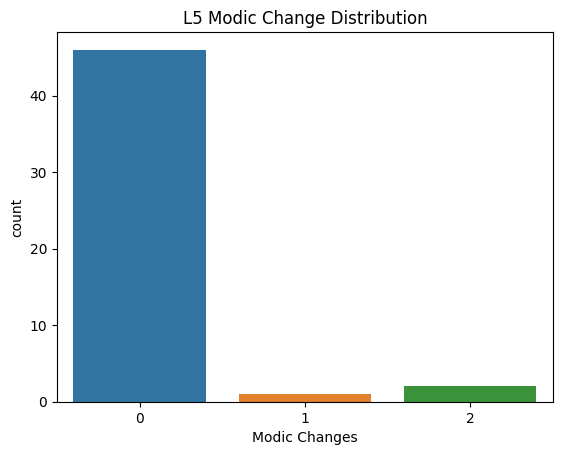

In [21]:
grouped_vb = radiomic_vb.groupby('vb')
for name, group in grouped_vb:
    sns.countplot(x=group['Modic Changes'])
    plt.title(f'{name} Modic Change Distribution')
    plt.show()
    

### Distribution of ODI Scores

Text(0.5, 1.0, 'ODI Distribution')

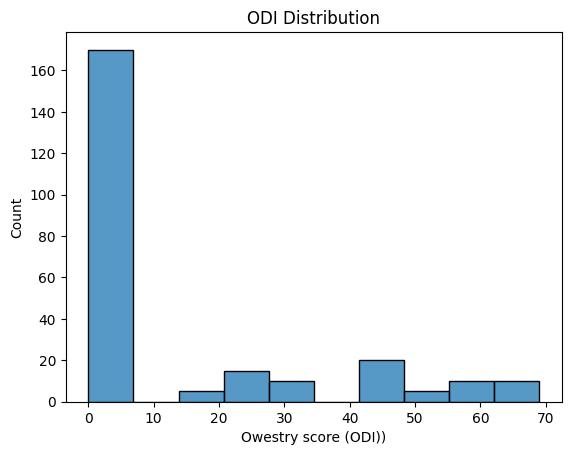

In [22]:
sns.histplot(x=radiomic_vb['Owestry score (ODI))'])
plt.title('ODI Distribution')

In [23]:
radiomic_vb['Owestry score (ODI))'].value_counts()

0.0     170
22.0     15
30.0     10
48.0     10
42.0      5
44.0      5
62.0      5
60.0      5
69.0      5
66.0      5
15.0      5
55.0      5
Name: Owestry score (ODI)), dtype: int64

### Distribution of Radiomic Feature Values Against Modic Change Classifications

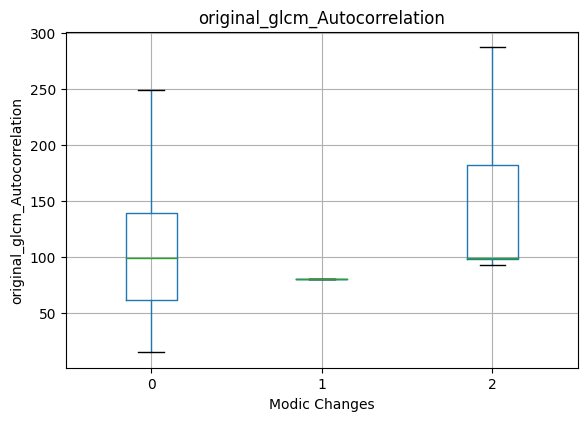

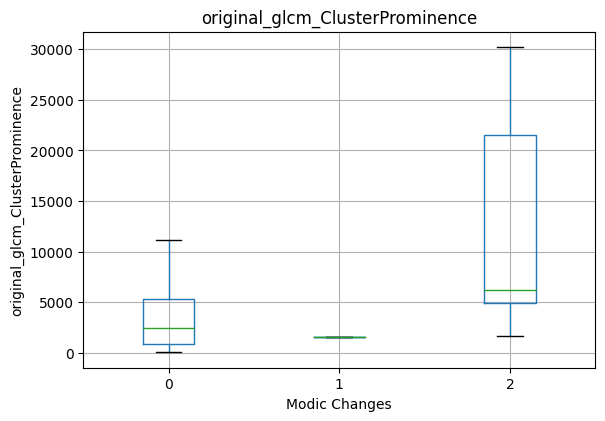

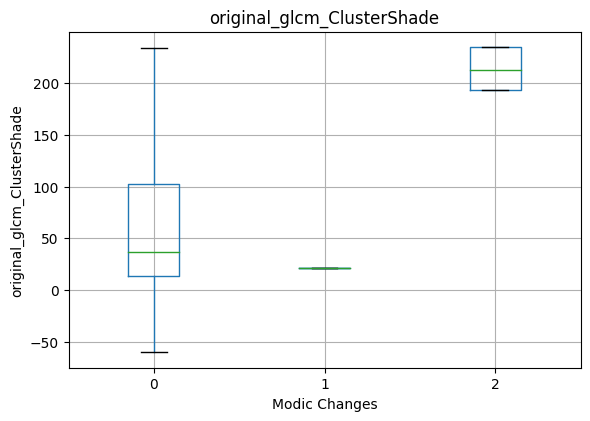

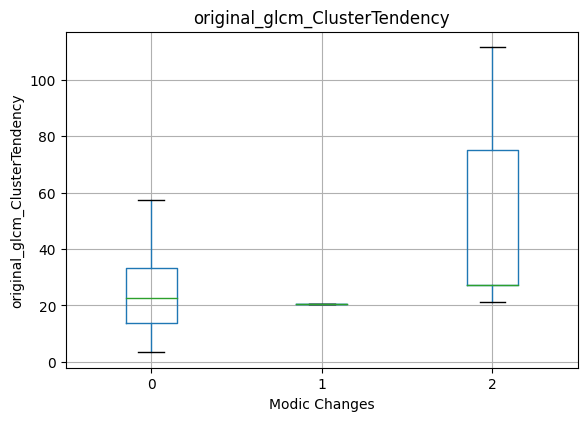

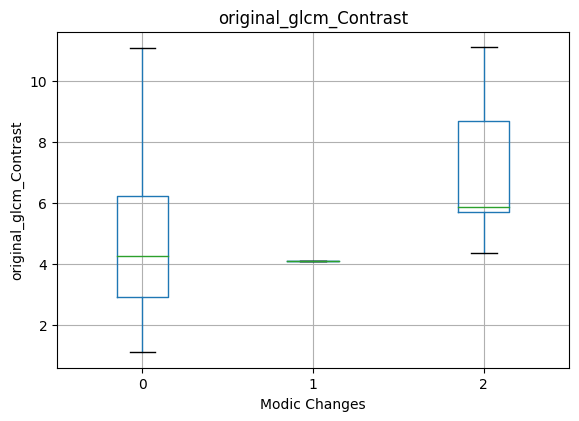

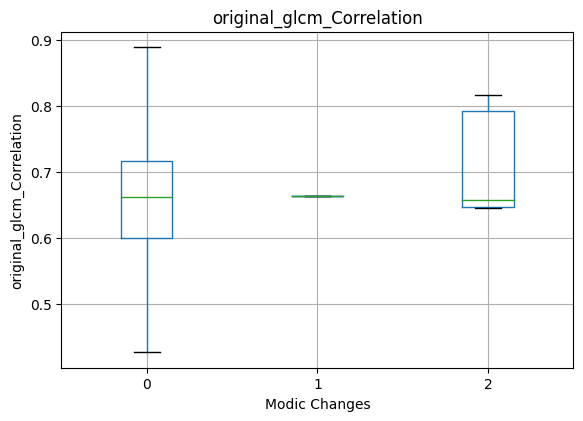

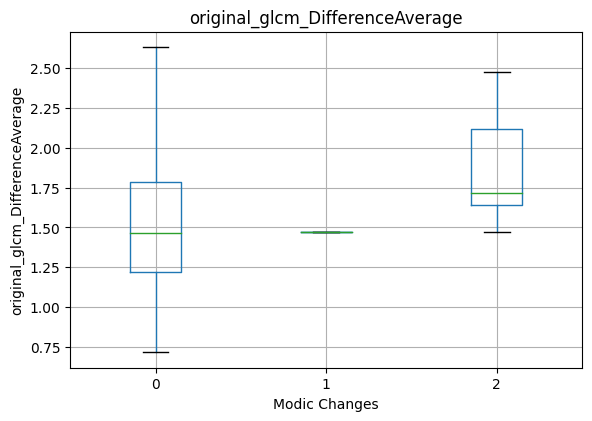

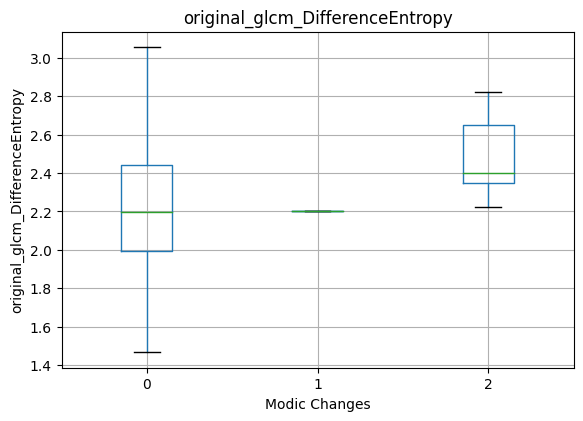

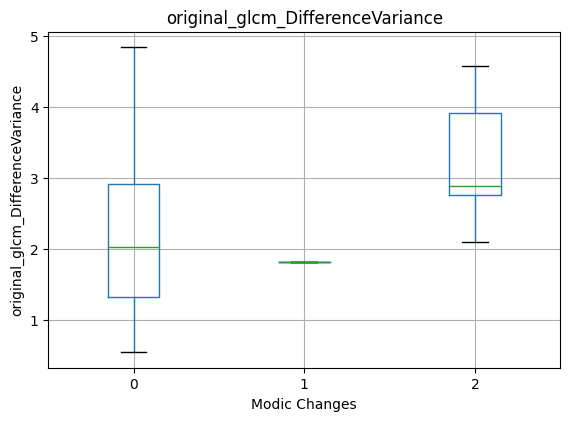

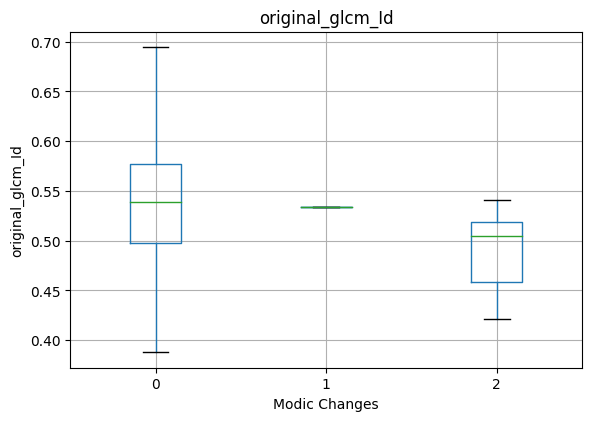

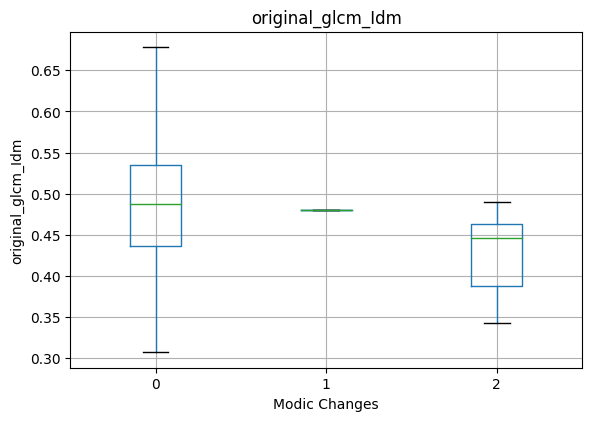

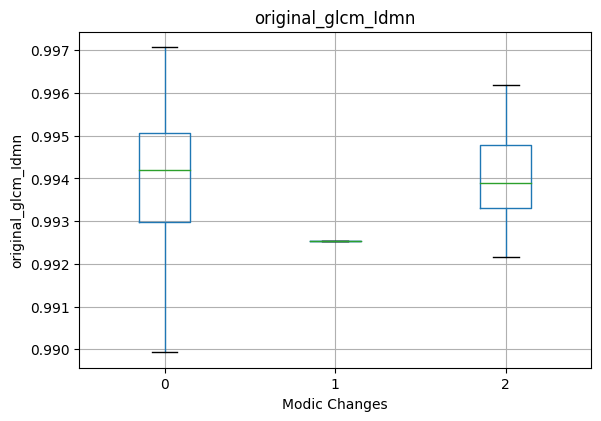

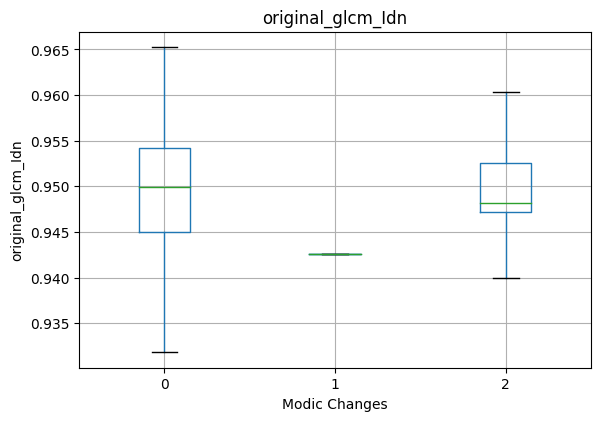

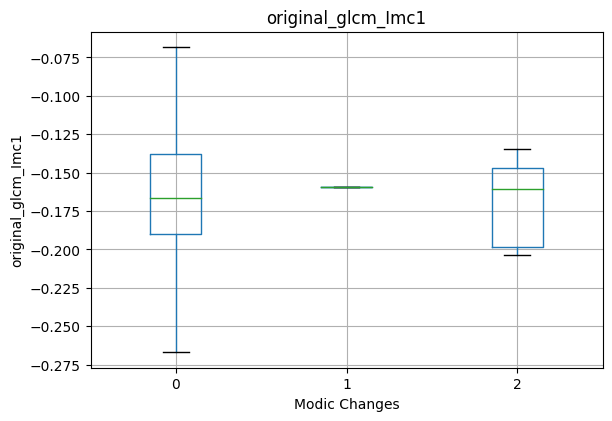

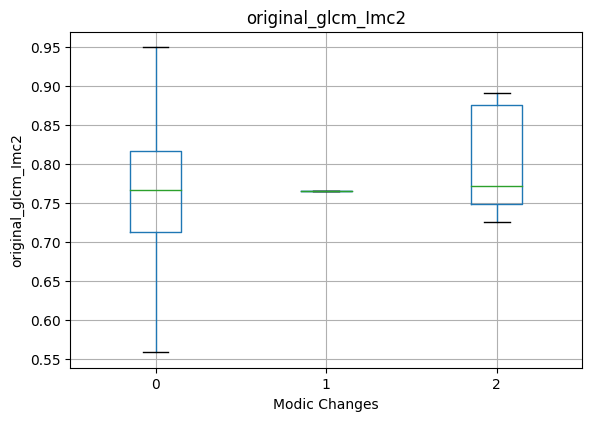

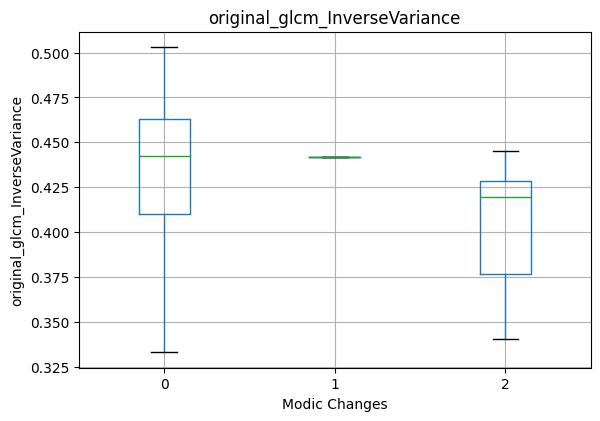

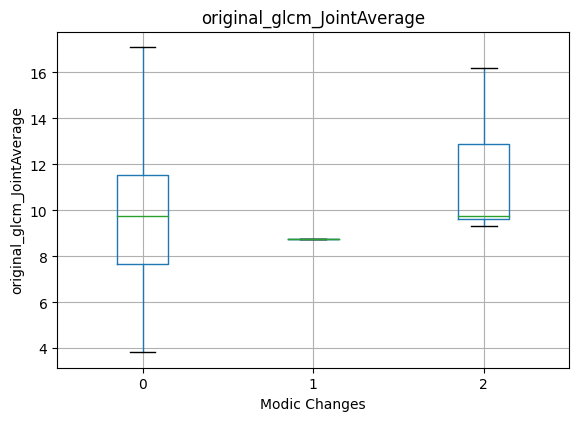

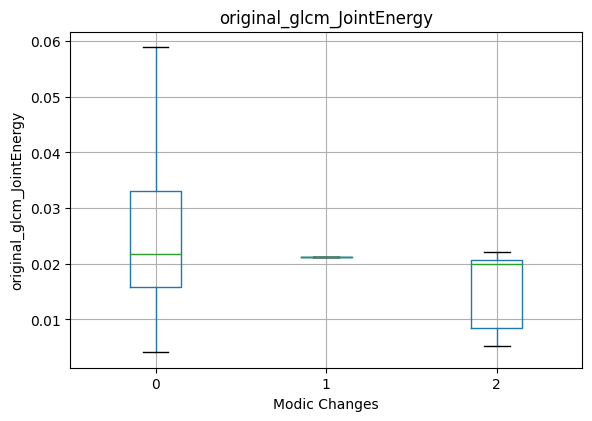

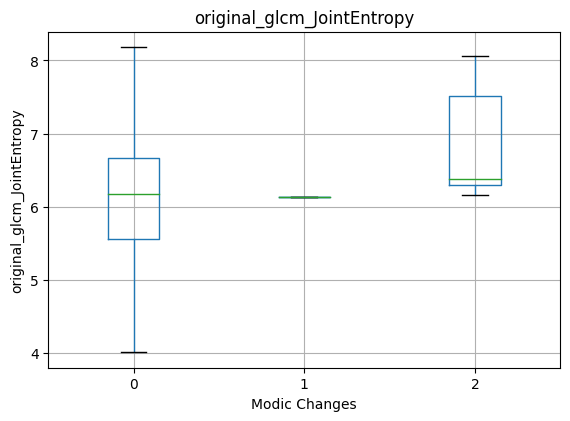

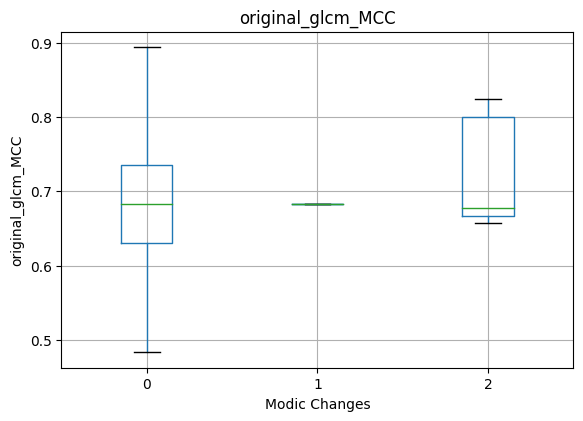

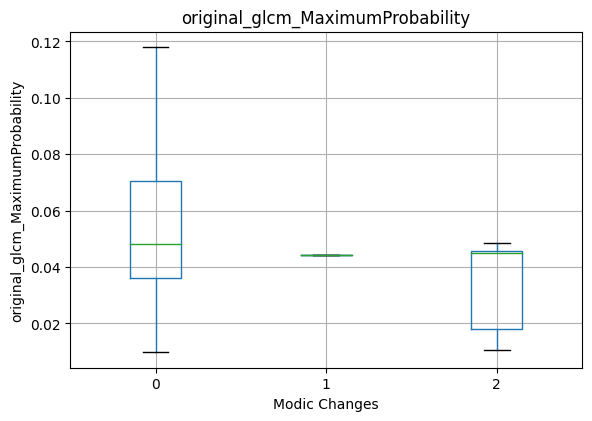

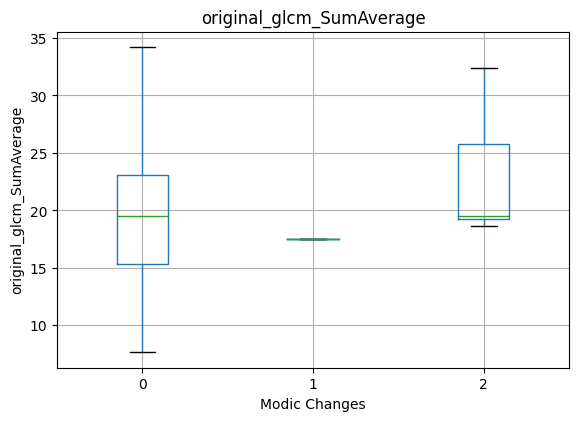

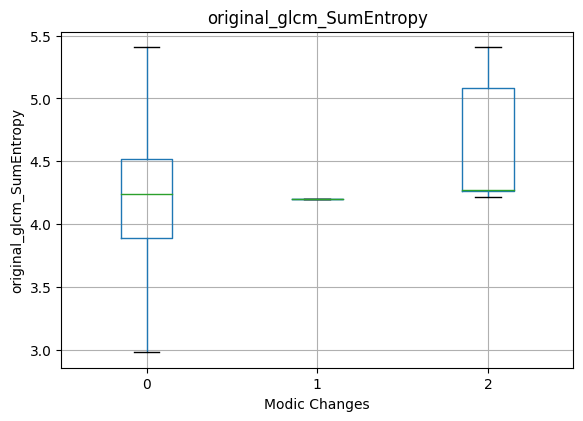

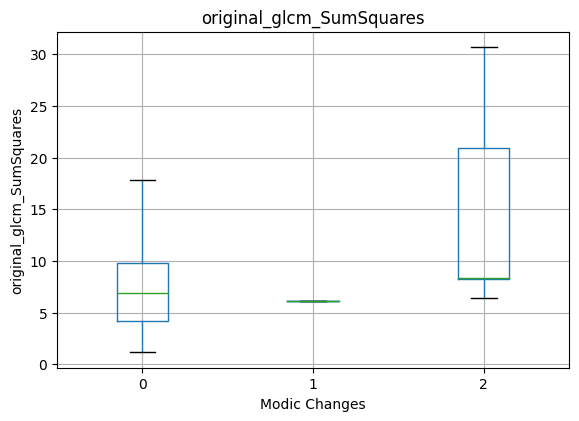

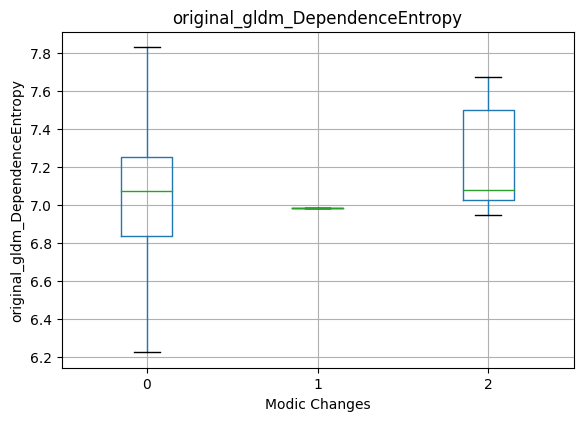

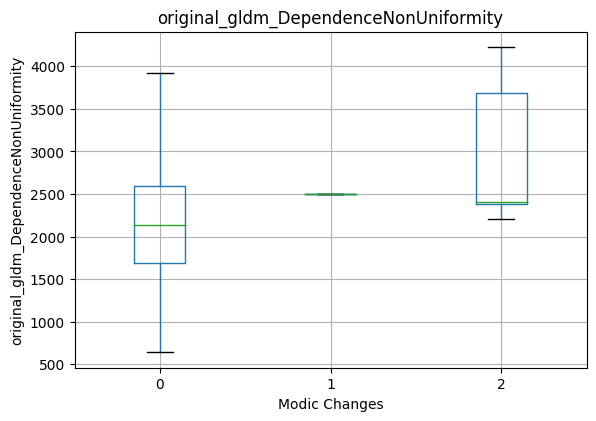

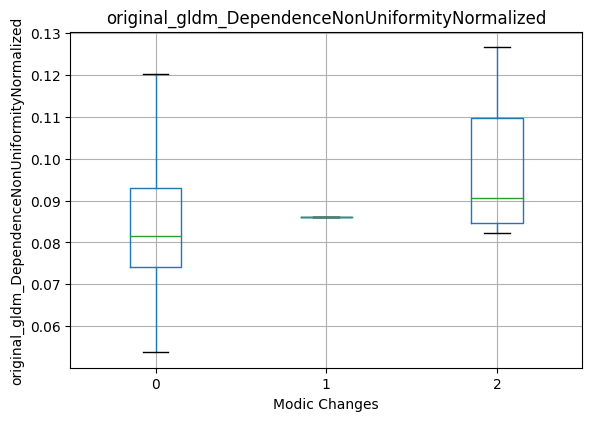

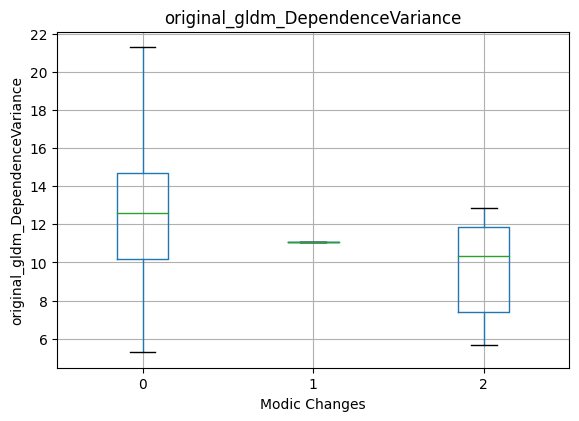

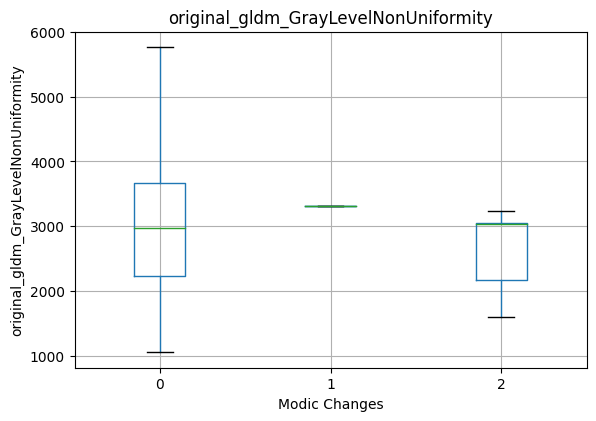

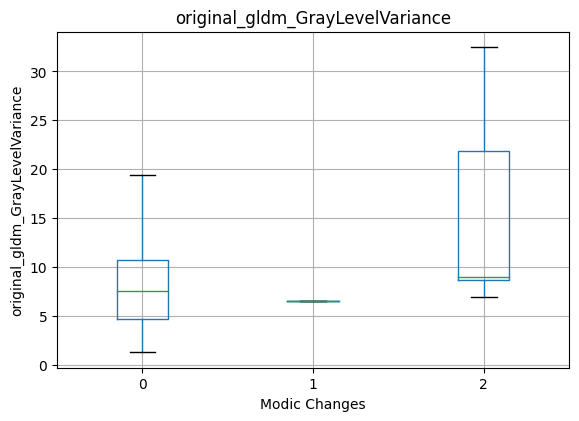

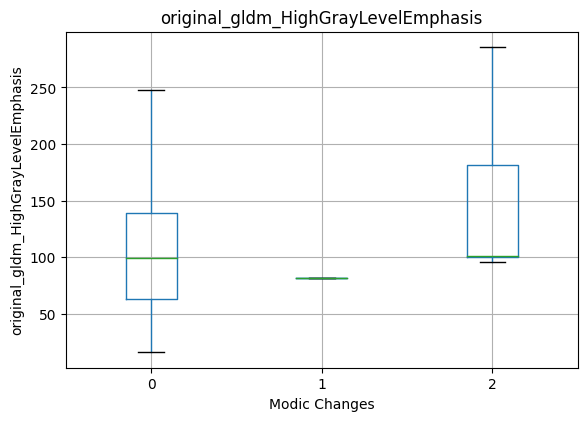

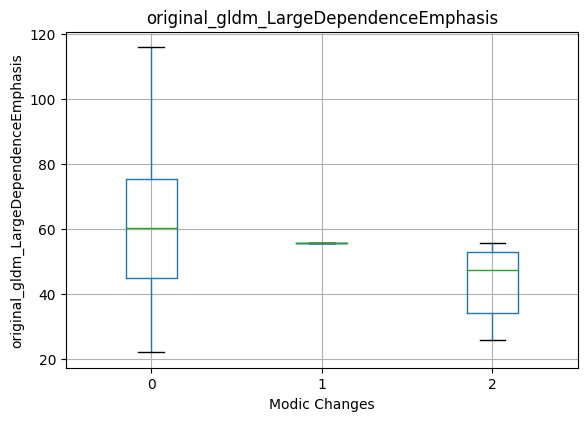

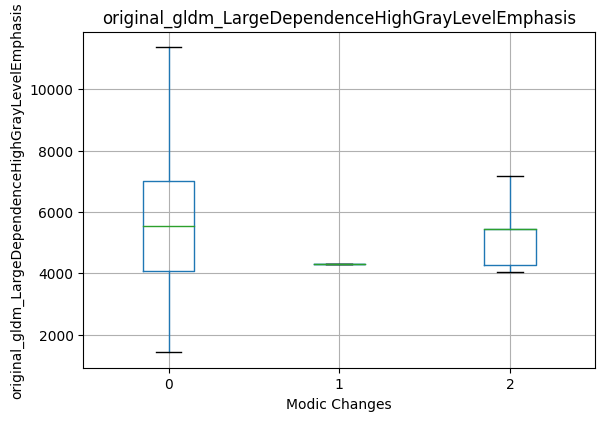

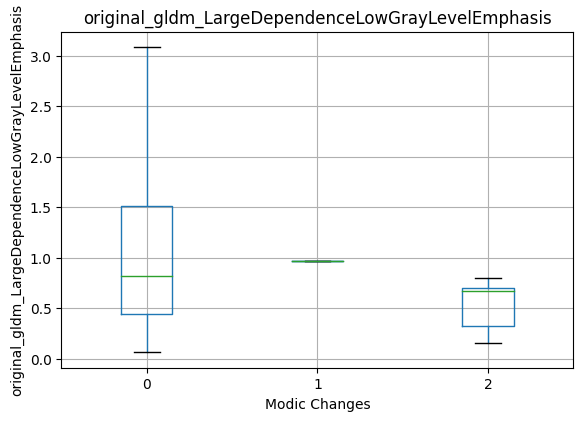

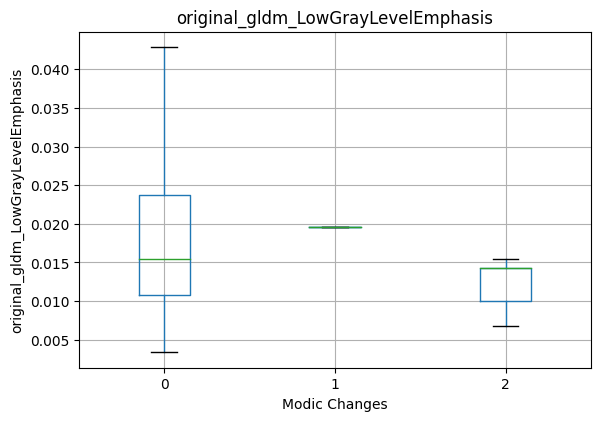

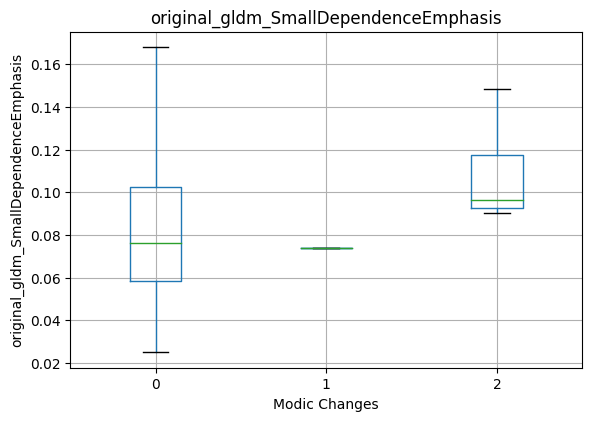

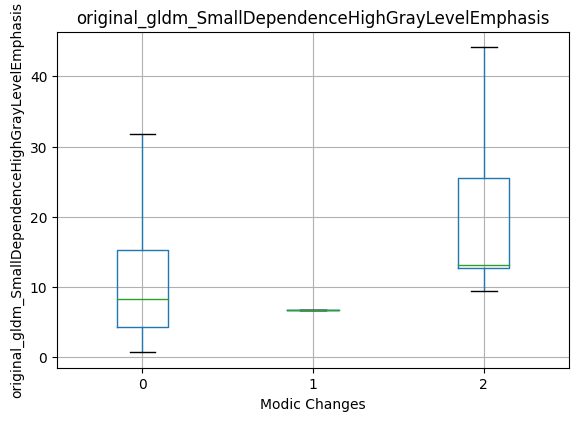

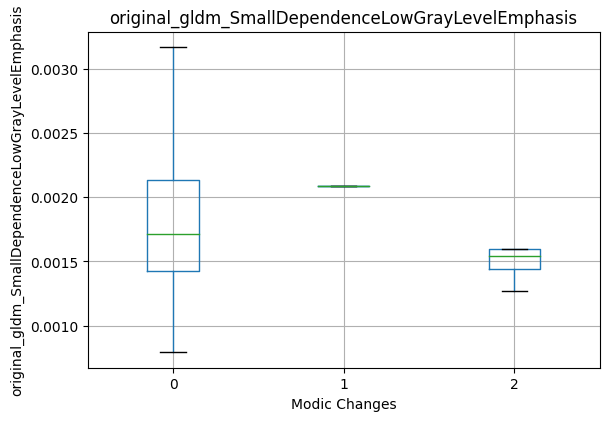

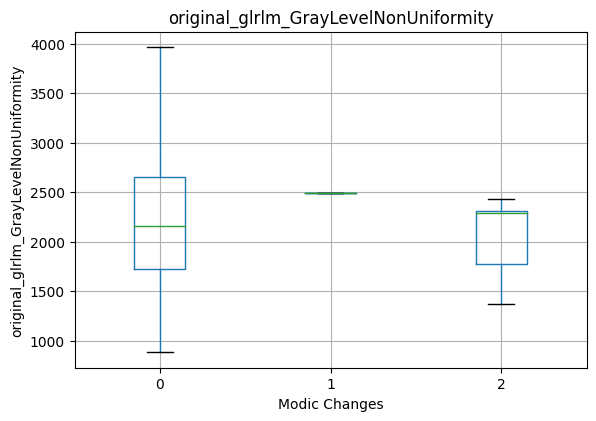

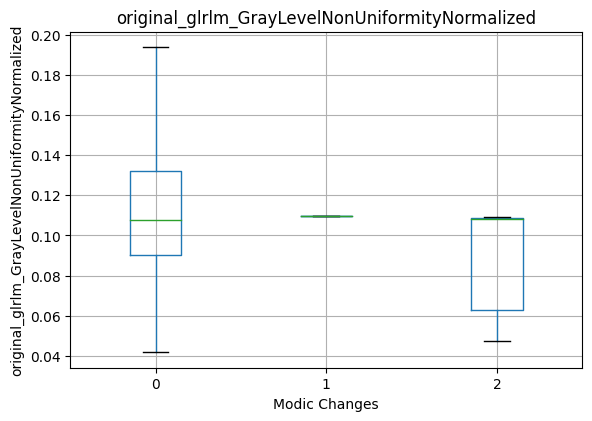

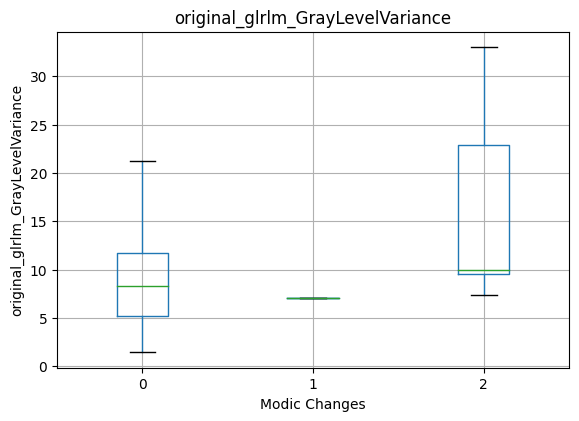

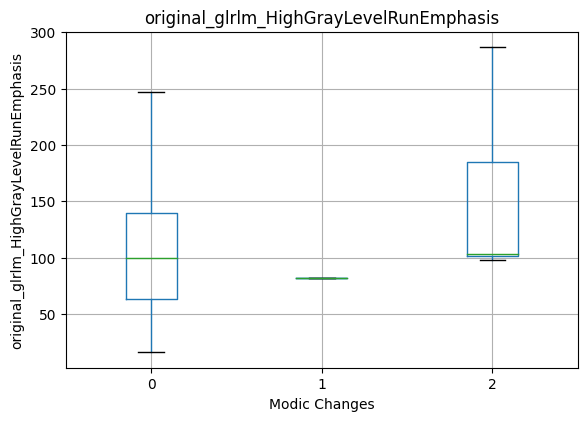

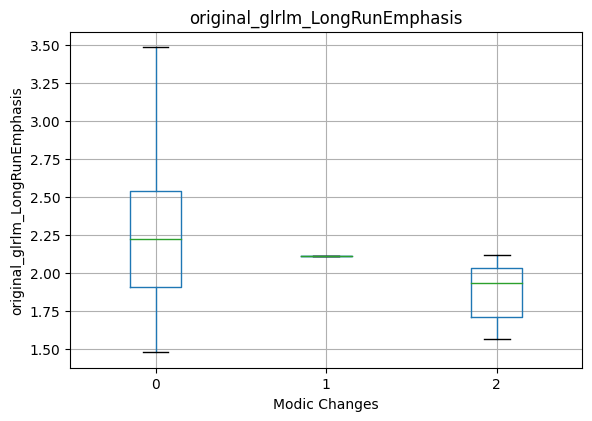

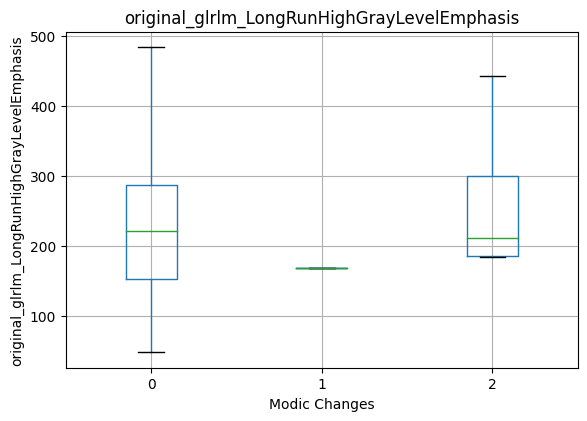

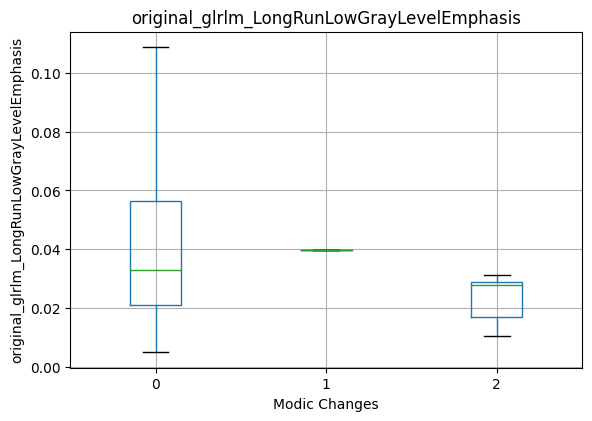

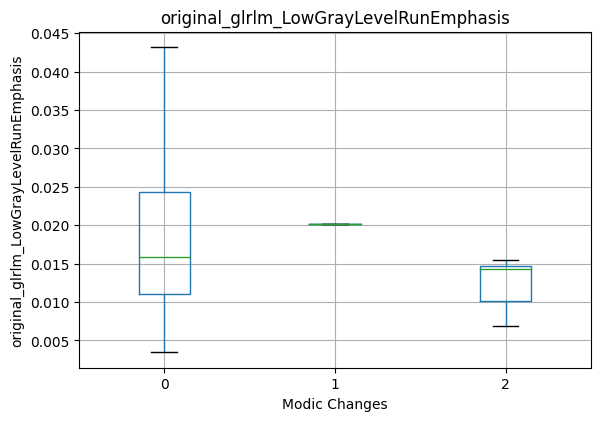

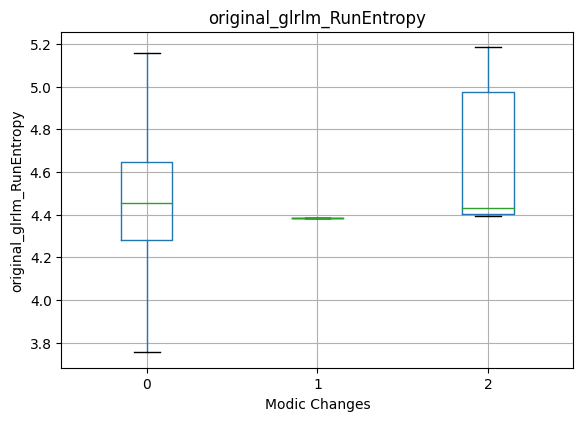

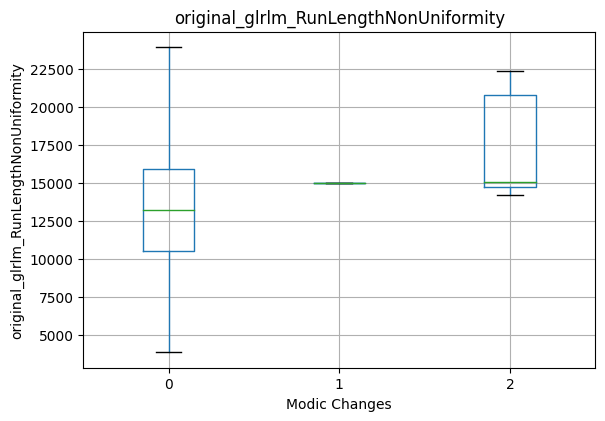

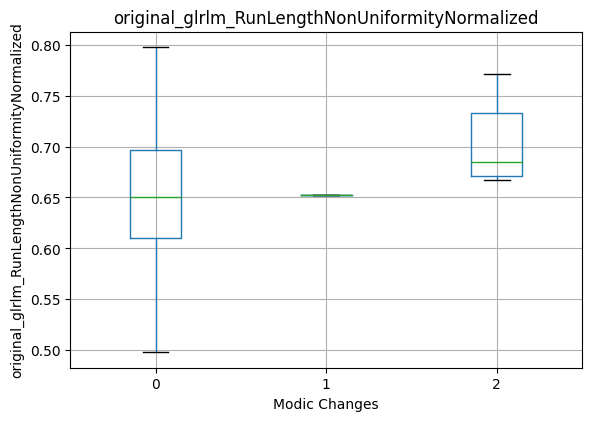

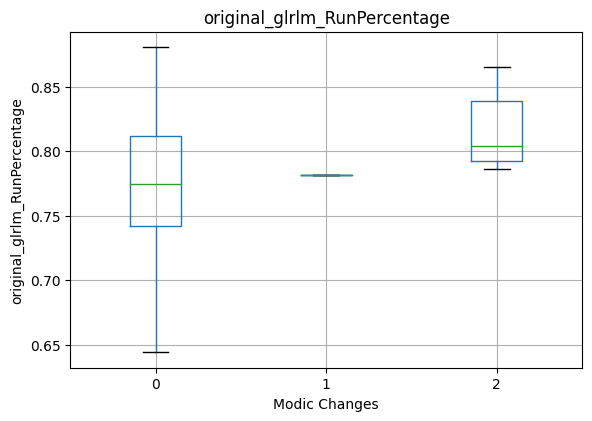

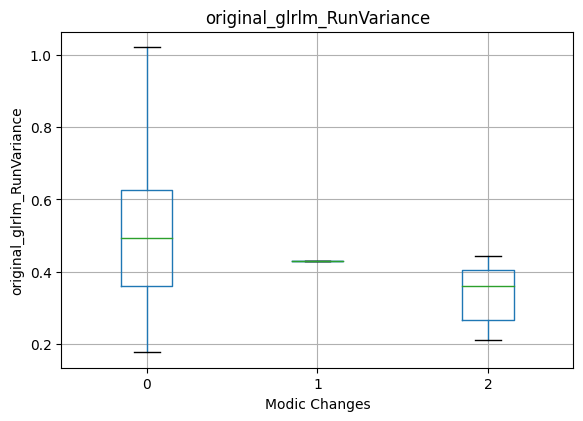

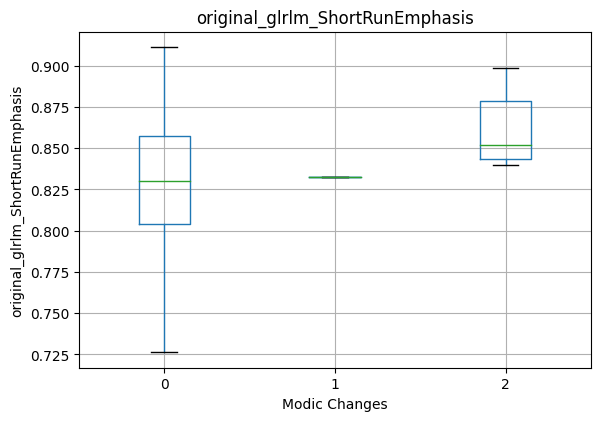

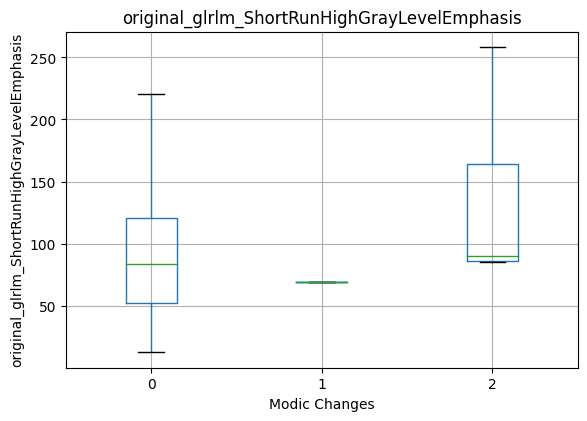

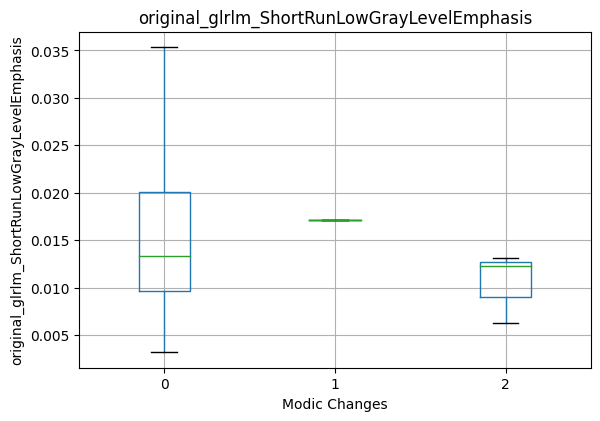

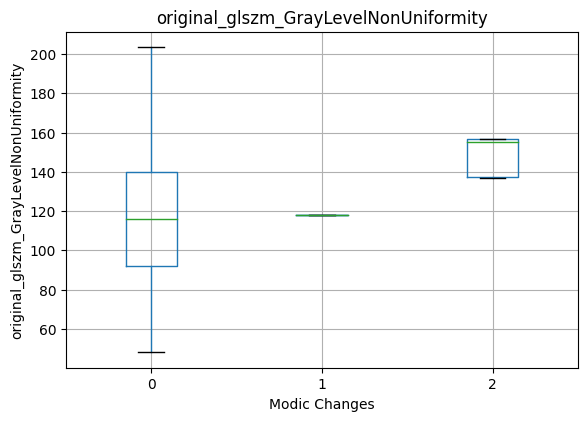

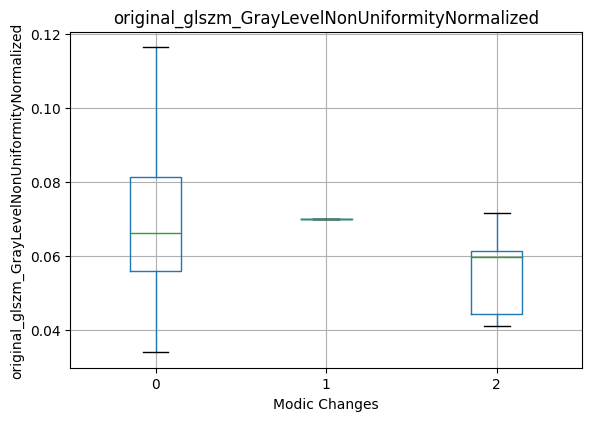

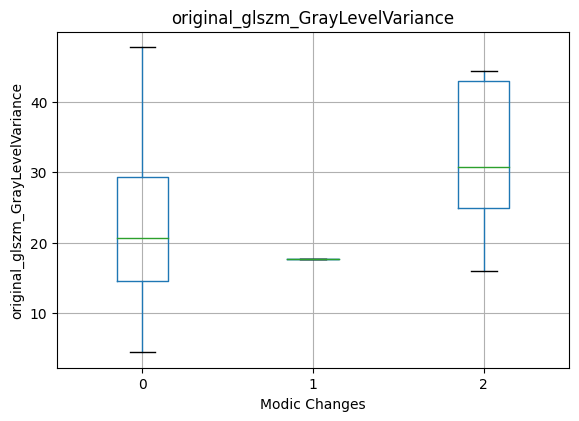

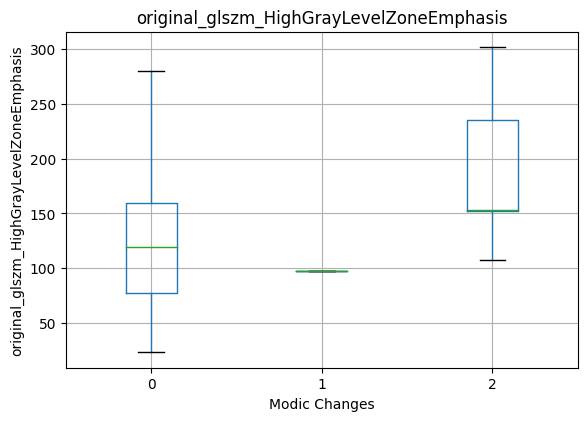

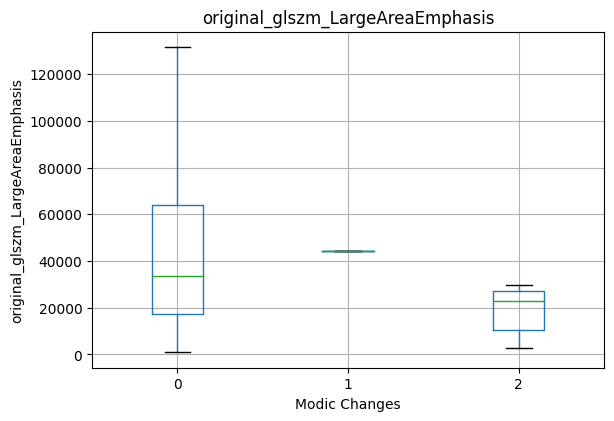

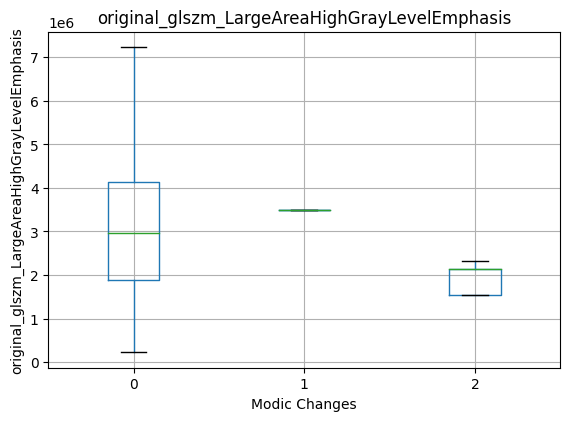

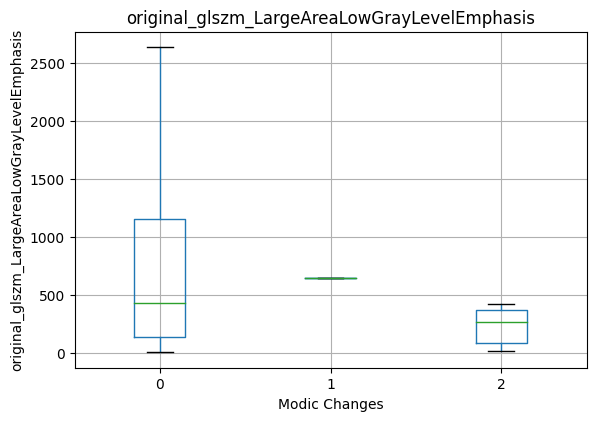

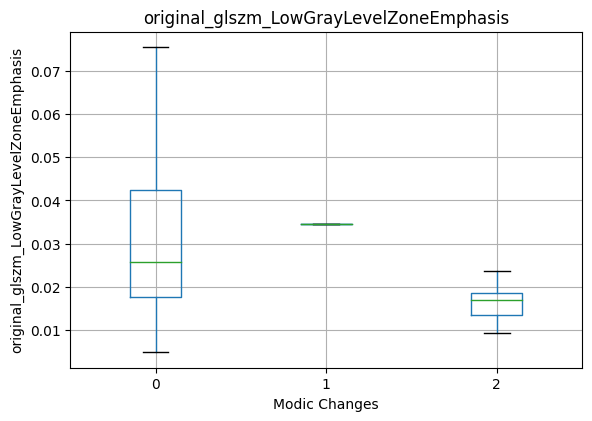

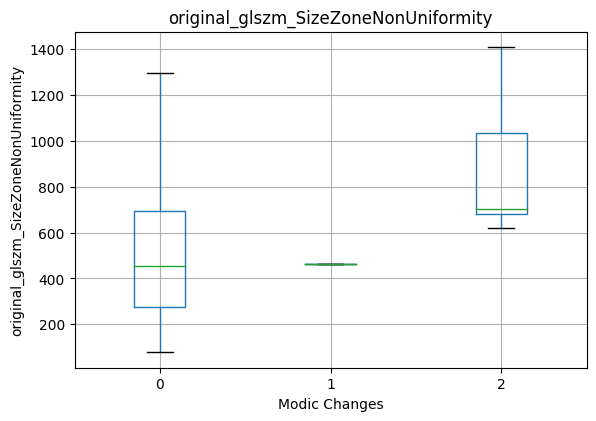

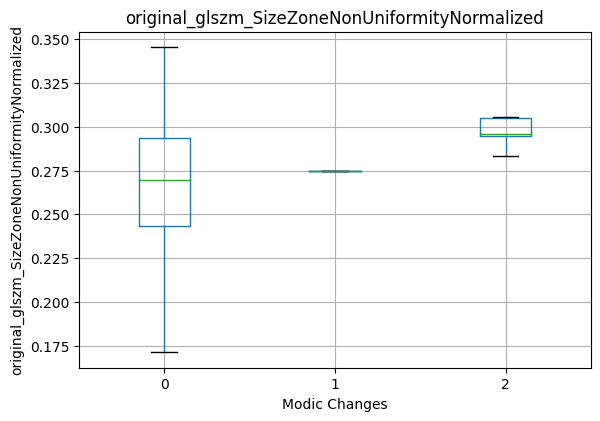

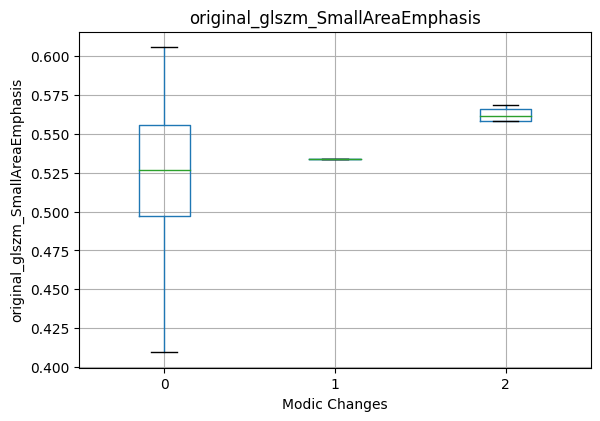

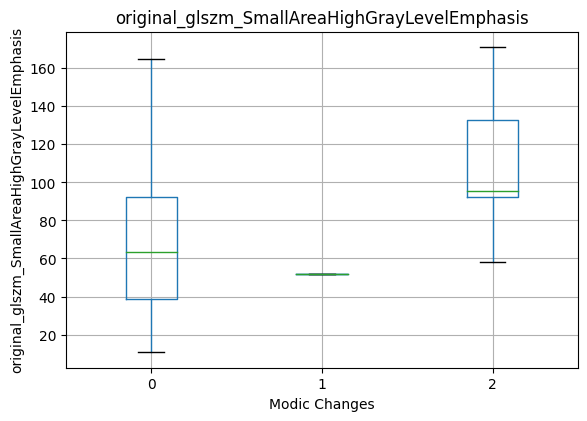

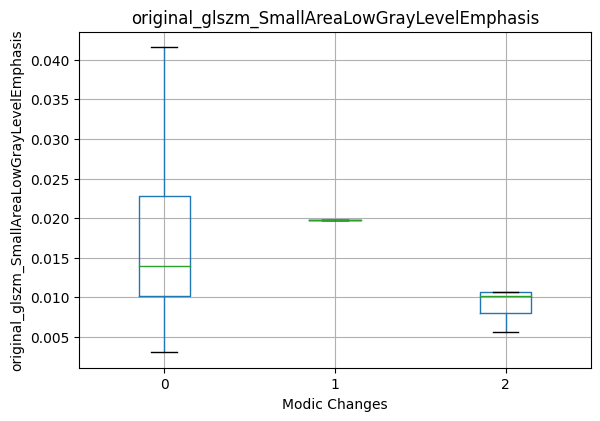

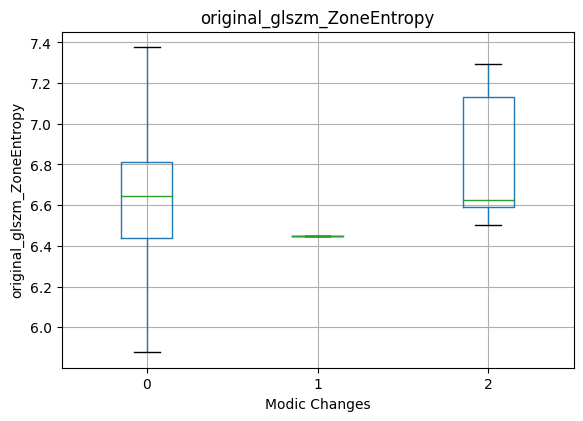

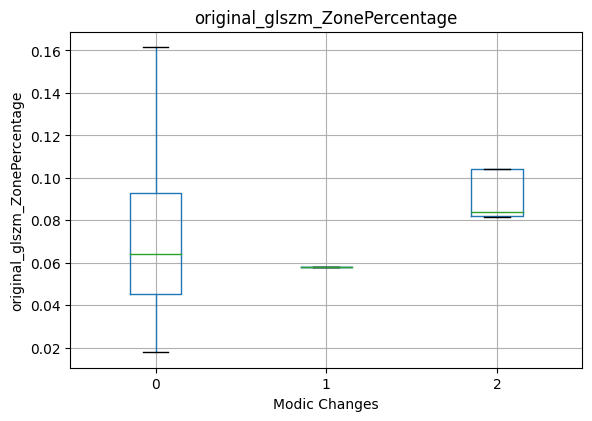

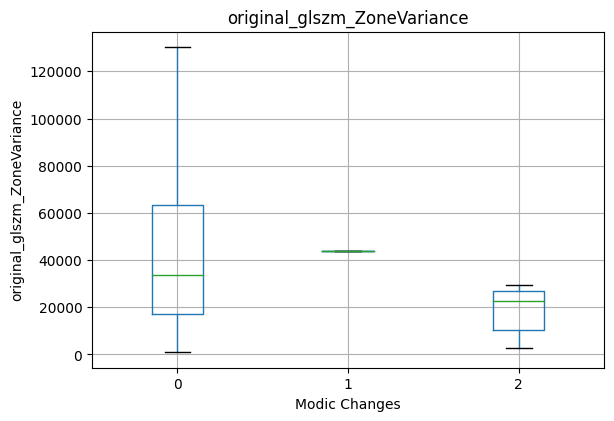

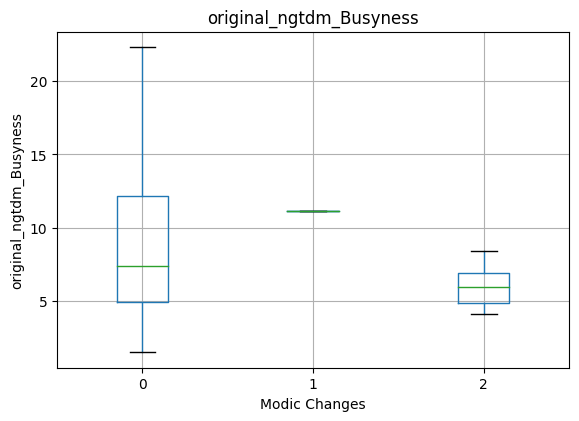

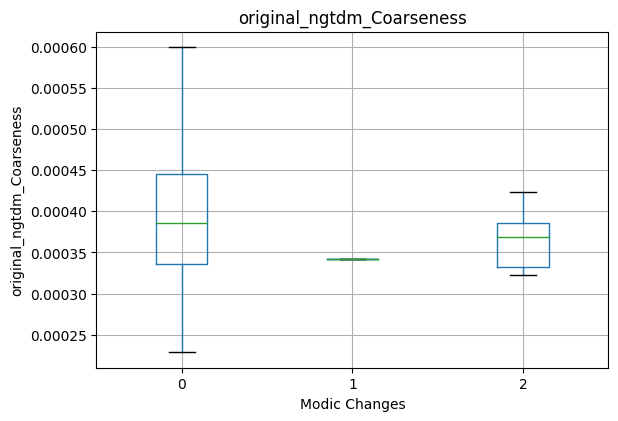

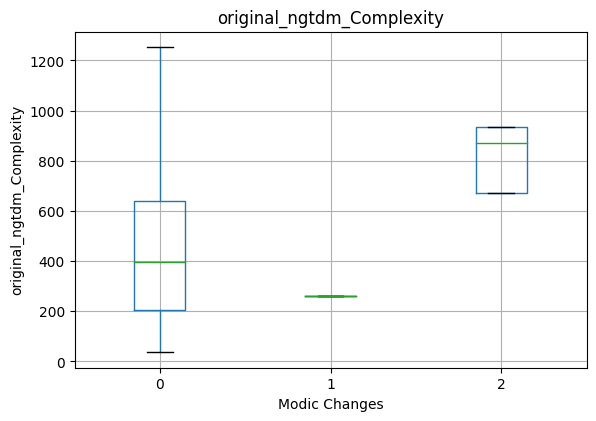

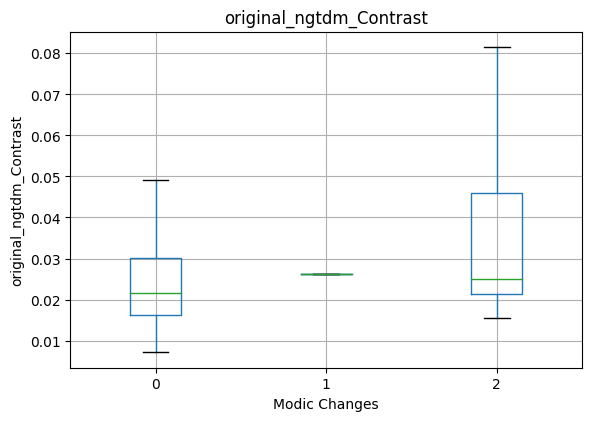

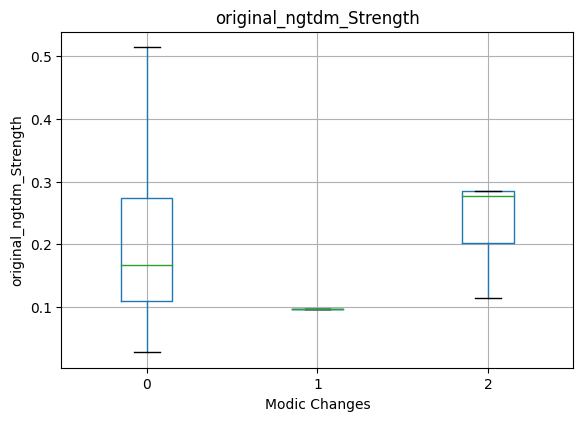

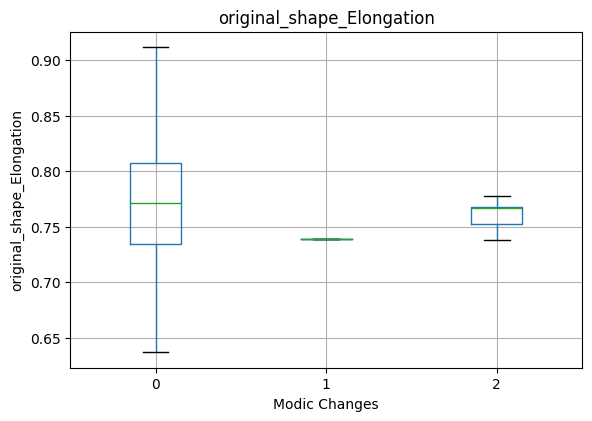

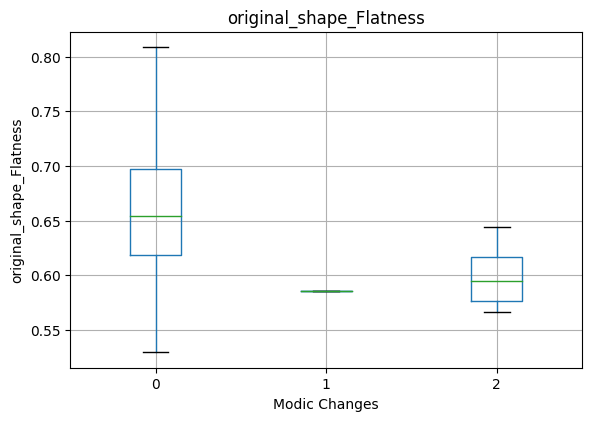

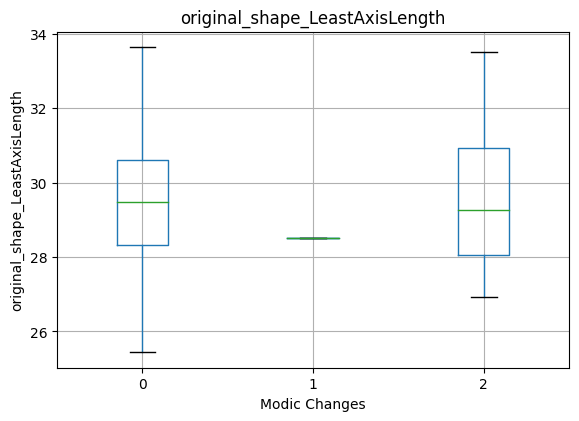

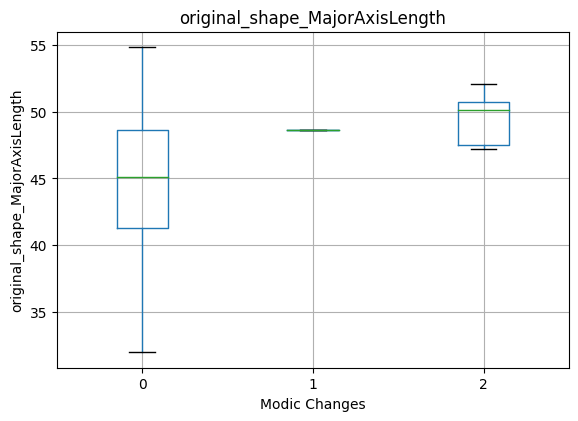

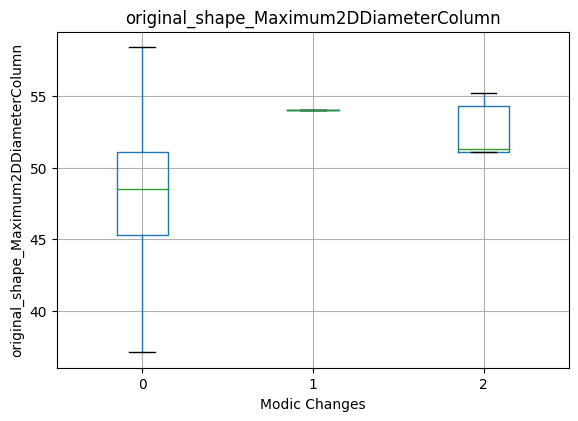

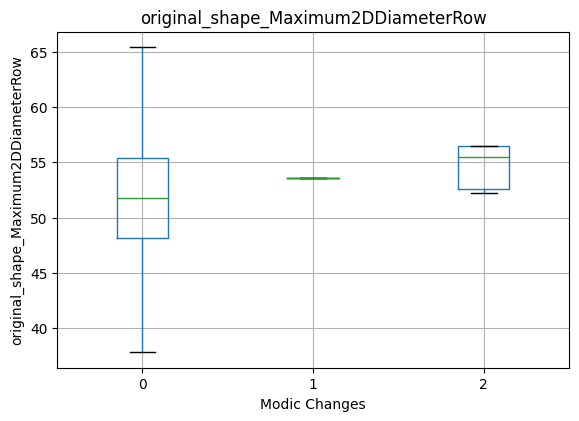

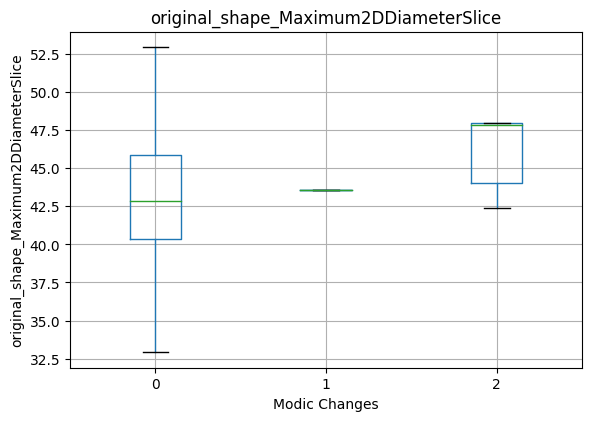

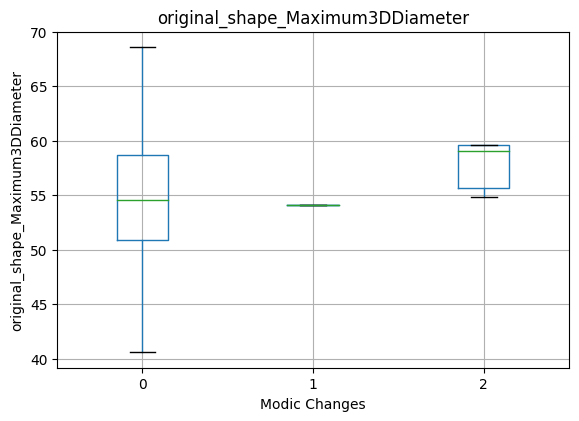

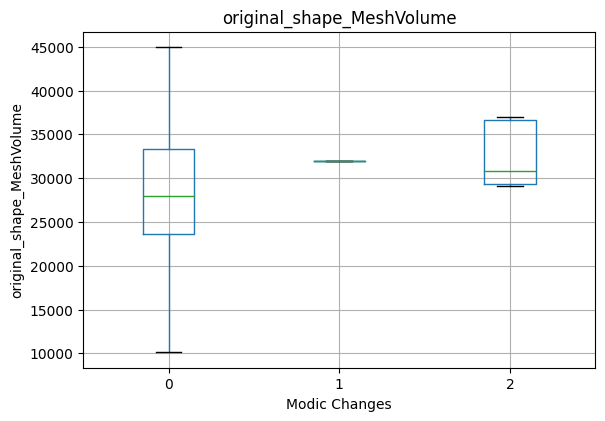

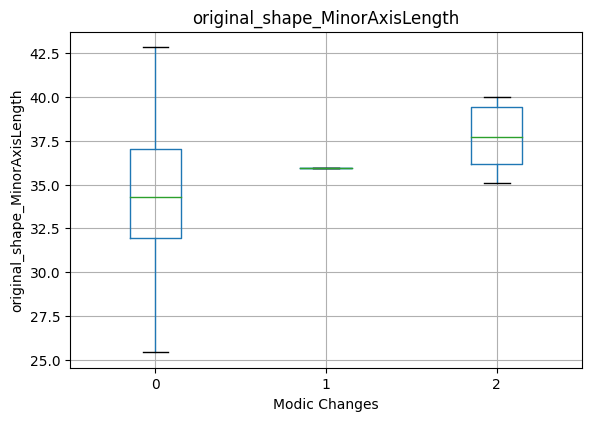

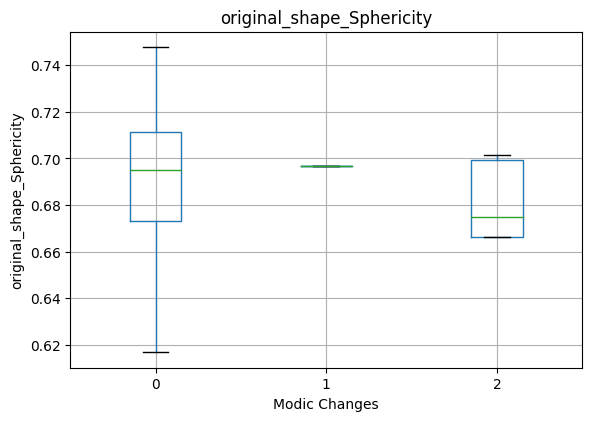

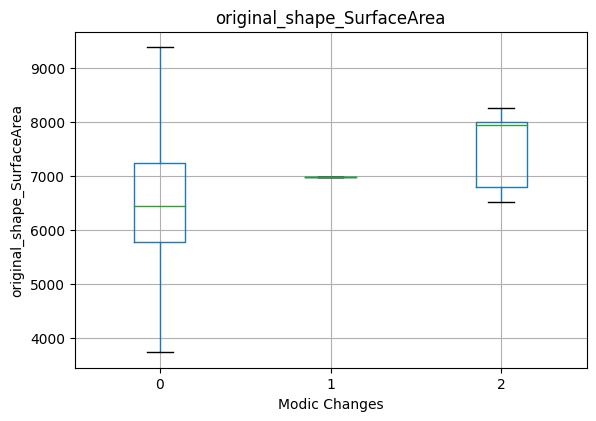

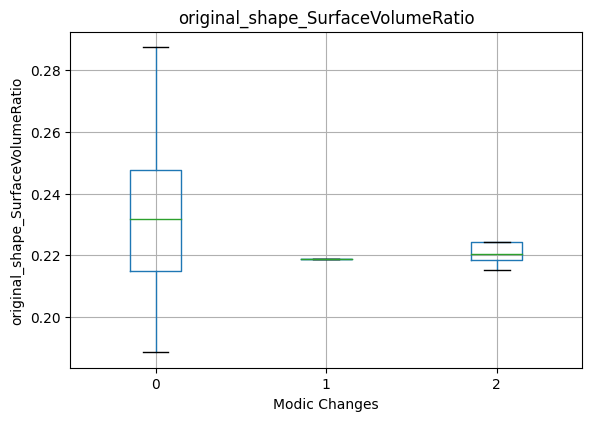

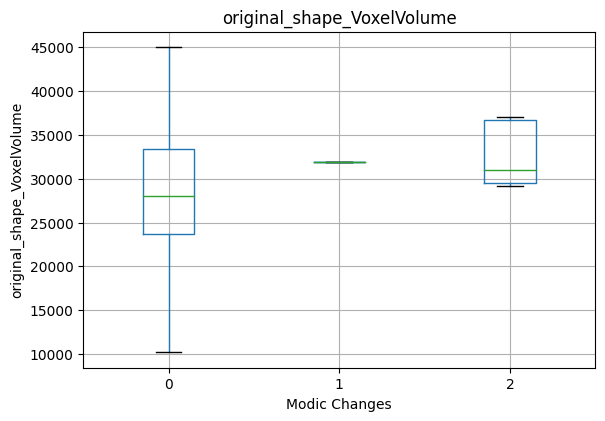

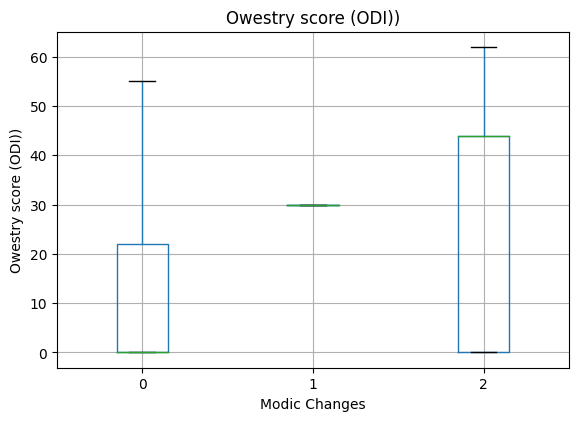

In [24]:
used_features = [name for name in radiomic_feature_names if name not in first_order_feat]

for feature in used_features: 
    radiomic_vb.boxplot(column=feature, by='Modic Changes', showfliers=False)
    plt.suptitle('')
    plt.ylabel(feature)

    plt.subplots_adjust(top=0.9, bottom=0.2)
    plt.show()

### Statistical Testing 

#### Kruskal-Wallis Test

 - Null Hypothesis : All groups have the same median 
 - Alternative Hypothesis : At lease one group has a different median 

In [25]:
categories = radiomic_vb['Modic Changes'].unique()

wallis_results = []

for feature in used_features: 
    groups = [radiomic_vb[radiomic_vb['Modic Changes']==cat][feature]for cat in categories]
    h, pval = kruskal(*groups)
    wallis_results.append([feature, h, pval])

_, p_adjusted, _, alpha_corrected = multipletests([test[2] for test in wallis_results],
                                                          method='bonferroni')

for x in range(len(p_adjusted)):
    wallis_results[x].append(p_adjusted[x])

print(tabulate(wallis_results, headers=['Feature', 'H-Statistic', 'P-Value', 'Adjusted P-Value'], 
               floatfmt='.3f'))
print('Corrected Alpha : ', alpha_corrected)

Feature                                               H-Statistic    P-Value    Adjusted P-Value
--------------------------------------------------  -------------  ---------  ------------------
original_glcm_Autocorrelation                               1.559      0.459               1.000
original_glcm_ClusterProminence                             4.337      0.114               1.000
original_glcm_ClusterShade                                  6.911      0.032               1.000
original_glcm_ClusterTendency                               3.125      0.210               1.000
original_glcm_Contrast                                      3.518      0.172               1.000
original_glcm_Correlation                                   1.148      0.563               1.000
original_glcm_DifferenceAverage                             3.420      0.181               1.000
original_glcm_DifferenceEntropy                             3.514      0.173               1.000
original_glcm_DifferenceVarian

#### ANOVA Test

 - Null Hypothesis : The means of all groups are the same 
 - Alternative Hypothesis : There is at least one group whose mean is different than the others

In [26]:
anova_results = [] 

for feature in used_features: 
    groups = [radiomic_vb[radiomic_vb['Modic Changes']==cat][feature]for cat in categories]
    f, pval = f_oneway(*groups)
    anova_results.append([feature, f, pval])

_, p_adjusted, _, alpha_corrected = multipletests([test[2] for test in wallis_results],
                                                          method='bonferroni')

for x in range(len(p_adjusted)):
    anova_results[x].append(p_adjusted[x])

print(tabulate(anova_results, headers=['Feature', 'H-Statistic', 'P-Value', 'Adjusted P-Value'], 
               floatfmt='.3f'))
print('Corrected Alpha : ', alpha_corrected)

Feature                                               H-Statistic    P-Value    Adjusted P-Value
--------------------------------------------------  -------------  ---------  ------------------
original_glcm_Autocorrelation                               0.557      0.573               1.000
original_glcm_ClusterProminence                             1.250      0.288               1.000
original_glcm_ClusterShade                                  2.805      0.062               1.000
original_glcm_ClusterTendency                               1.967      0.142               1.000
original_glcm_Contrast                                      0.918      0.401               1.000
original_glcm_Correlation                                   1.038      0.356               1.000
original_glcm_DifferenceAverage                             1.358      0.259               1.000
original_glcm_DifferenceEntropy                             1.509      0.223               1.000
original_glcm_DifferenceVarian

#### Kruskal For Each Vertebra Group

In [27]:
for name, group in grouped_vb:
    wallis_results = []

    for feature in used_features: 
        groups = [radiomic_vb[radiomic_vb['Modic Changes']==cat][feature]for cat in categories]
        h, pval = kruskal(*groups)
        wallis_results.append([feature, h, pval])

    _, p_adjusted, _, alpha_corrected = multipletests([test[2] for test in wallis_results],
                                                            method='bonferroni')

    for x in range(len(p_adjusted)):
        wallis_results[x].append(p_adjusted[x])

    print(f'----------------------{name}--------------------')
    print(tabulate(wallis_results, headers=['Feature', 'H-Statistic', 'P-Value', 'Adjusted P-Value'], 
                floatfmt='.3f'))
    print(f'Corrected Alpha : {alpha_corrected}', '\n\n')

----------------------L1--------------------
Feature                                               H-Statistic    P-Value    Adjusted P-Value
--------------------------------------------------  -------------  ---------  ------------------
original_glcm_Autocorrelation                               1.559      0.459               1.000
original_glcm_ClusterProminence                             4.337      0.114               1.000
original_glcm_ClusterShade                                  6.911      0.032               1.000
original_glcm_ClusterTendency                               3.125      0.210               1.000
original_glcm_Contrast                                      3.518      0.172               1.000
original_glcm_Correlation                                   1.148      0.563               1.000
original_glcm_DifferenceAverage                             3.420      0.181               1.000
original_glcm_DifferenceEntropy                             3.514      0.173      

### ANOVA For Each Vertebra Group

In [28]:
for name, group in grouped_vb:
    anova_results = [] 

    for feature in used_features: 
        groups = [radiomic_vb[radiomic_vb['Modic Changes']==cat][feature]for cat in categories]
        f, pval = f_oneway(*groups)
        anova_results.append([feature, f, pval])

    _, p_adjusted, _, alpha_corrected = multipletests([test[2] for test in wallis_results],
                                                            method='bonferroni')

    for x in range(len(p_adjusted)):
        anova_results[x].append(p_adjusted[x])

    print(f'----------------------{name}--------------------')
    print(tabulate(anova_results, headers=['Feature', 'H-Statistic', 'P-Value', 'Adjusted P-Value'], 
                floatfmt='.3f'))
    print('Corrected Alpha : ', alpha_corrected, '\n\n')

----------------------L1--------------------
Feature                                               H-Statistic    P-Value    Adjusted P-Value
--------------------------------------------------  -------------  ---------  ------------------
original_glcm_Autocorrelation                               0.557      0.573               1.000
original_glcm_ClusterProminence                             1.250      0.288               1.000
original_glcm_ClusterShade                                  2.805      0.062               1.000
original_glcm_ClusterTendency                               1.967      0.142               1.000
original_glcm_Contrast                                      0.918      0.401               1.000
original_glcm_Correlation                                   1.038      0.356               1.000
original_glcm_DifferenceAverage                             1.358      0.259               1.000
original_glcm_DifferenceEntropy                             1.509      0.223      